# **PREDIKSI MINAT MAHASISWA DALAM MENENTUKAN KARIR BERWIRAUSAHA UNTUK MENDORONG TRANSFORMASI EKONOMI**

## **IMPORT LIBRARY**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pickle

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import GridSearchCV

## **BUSINESS UNDERSTANDING**

### **Business Objective**

Tujuan bisnis dari dataset ini adalah menganalisis faktor-faktor yang nantinya akan mempengaruhi keputusan mahasiswa untuk menjadi wirausahawan dengan dilakukan analisis prediksi apakah mahasiswa tersebut berpotensi menjadi wirausahawan atau tidak berdasarkan pola atau faktor yang mempengaruhinya dengan tujuan utama untuk untuk menciptakan peluang kerja dan mendorong pertumbuhan ekonomi yang berkelanjutan demi transformasi ekonomi di masa depan.

### **Assess Situation**

Situasi bisnis yang mendasari analisis ini adalah kebutuhan yang mendesak untuk memperkuat sektor kewirausahaan sebagai penggerak pertumbuhan ekonomi. Saat ini, kesadaran akan penting kewirausahaan terutama dalam menciptakan lapangan pekerjaan dan menggerakkan roda ekonomi semakin meningkat dan diperlukan upaya lebih terfokus untuk mendukung calon wirausahawan, terutama di kalangan mahasiswa, guna mencapai pertumbuhan ekonomi yang berkelanjutan. Dengan tingkat pengangguran tinggi dan tantangan ekonomi yang terus berkembang, penting untuk memperkuat ekosistem kewirausahaan. Hal ini membutuhkan pemahaman yang mendalam tentang faktor-faktor yang memengaruhi mahasiswa untuk memilih jalur kewirausahaan dan identifikasi potensi wirausahawan di antara mereka.

### **Data Mining Goals**

Tujuan dari Data Mining pada dataset ini adalah untuk dapat memprediksi apakah mahasiswa tersebut berpotensi menjadi wirausahawan atau tidak berdasarkan pola atau faktor yang mempengaruhi analisis prediksi yang dilakukan. Dengan memahami faktor-faktor yang mempengaruhi, dapat dibangun model prediktif yang dapat membantu dalam mengidentifikasi mahasiswa yang berpotensi menjadi wirausahawan, sehingga dapat diambil tindakan yang tepat untuk mendukung perkembangan dan menggerakkan pertumbuhan ekonomi yang berkelanjutan.

### **Project Plan**

Rencana proyek yang dilakukan pertama kali adalah melalui tahap "Business Understanding" dengan memahami secara mendalam tentang tujuan bisnis dan kebutuhan analisis data yang telah ditetapkan. Kemudian, tahap "Data Understanding" dengan mengumpulkan data terlebih, memastikan bahwa dataset yang diperlukan telah diperoleh, dan memahami dataset secara mendalam serta mengecek kualitas data. Lalu, tahap "Data Understanding" dengan melakukan preprocessing data, di mana data disiapkan untuk analisis lebih lanjut dengan membersihkan dan mempersiapkan data agar kualitas data semakin baik. Selanjutnya adalah analisis data, di mana data yang telah diproses akan dieksplorasi lebih lanjut untuk mengidentifikasi pola, hubungan, dan wawasan yang relevan. Ini sesuai dengan tahap "Modeling" dalam CRISP-DM. Setelah pola-pola yang signifikan diidentifikasi, langkah selanjutnya adalah pengembangan model prediktif. Model-model ini akan digunakan untuk memprediksi apakah seorang mahasiswa memiliki potensi menjadi wirausahawan berdasarkan faktor-faktor yang mempengaruhinya. Langkah terakhir adalah evaluasi dan deployment model, di mana kinerja model akan dievaluasi secara menyeluruh dan model akan diimplementasikan untuk digunakan dalam memprediksi potensi kewirausahaan mahasiswa secara praktis.

## **DATA UNDERSTANDING**

### **Collect Initial Data**

Sumber data yang digunakan dalam analisis ini adalah dataset Entrepreneurial Competency in University Students sebagai data publik yang di dapatkan melalui website kaggle. Lalu, dataset yang telah diunduh dari kaggle di ekspor pada github yang nantinya digunakan dalam analisis ini.


**Link Dataset Kaggle:**

* https://www.kaggle.com/datasets/namanmanchanda/entrepreneurial-competency-in-university-students?select=data.csv


**Link Dataset Github:**
* https://raw.githubusercontent.com/KELOMPOK-3-PA-CAPSTONE/DATASET/main/data.csv


In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/KELOMPOK-3-PA-CAPSTONE/DATASET/main/data.csv")
df.head()

,EducationSector,IndividualProject,Age,Gender,City,Influenced,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,StrongNeedToAchieve,SelfConfidence,GoodPhysicalHealth,MentalDisorder,KeyTraits,ReasonsForLack,y
0,Engineering Sciences,No,19,Male,Yes,No,2,2,3,3,2,2,3,Yes,Passion,NaN,1
1,Engineering Sciences,Yes,22,Male,No,Yes,3,3,3,4,4,3,4,Yes,Vision,Just not interested! (Want to work in the corp...,0
2,Engineering Sciences,No,18,Male,Yes,No,3,4,3,3,3,4,4,No,Passion,Not willing to start a venture in India and wa...,0
3,Engineering Sciences,Yes,20,Male,Yes,Yes,3,3,3,3,4,3,3,No,Resilience,Not able to take a Financial Risk,0
4,Engineering Sciences,Yes,19,Male,Yes,Yes,2,3,3,3,4,3,2,Yes,Vision,NaN,1


### **Describe Data**

#### **Informasi Dasar**

In [4]:
num_rows, num_columns = df.shape

print(f"Jumlah Baris: {num_rows}")
print(f"Jumlah Kolom: {num_columns}")

Jumlah Baris: 219
Jumlah Kolom: 17


Dalam dataset Entrepreneurial Competency in University Students dilakukan pengecekan jumlah baris dan kolomnya untuk mengetahui informasi dasar dari dataset. Setelah dilakukan pengecekan, diketahui bahwa dataset tersebut terdiri dari 219 baris dan 17 kolom.

In [5]:
df.count()

EducationSector           219
IndividualProject         219
Age                       219
Gender                    219
City                      219
Influenced                219
Perseverance              219
DesireToTakeInitiative    219
Competitiveness           219
SelfReliance              219
StrongNeedToAchieve       219
SelfConfidence            219
GoodPhysicalHealth        219
MentalDisorder            219
KeyTraits                 219
ReasonsForLack            128
y                         219
dtype: int64

Dari hasil count record data dalam kolom-kolom yang terdapat dalam dataset dapat disimpulkan bahwa kolom EducationSector, IndividualProject, Age, Gender, City, Influenced, Perseverance, DesireToTakeInitiative, Competitiveness, SelfReliance, StrongNeedToAchieve, SelfConfidence, GoodPhysicalHealth, MentalDisorder, KeyTraints, dan y memiliki record data berjumlah 219. Sedangkan pada kolom ReasonsForLack hanya memiliki record data berjumlah 128.

#### **Informasi Lanjutan**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   EducationSector         219 non-null    object
 1   IndividualProject       219 non-null    object
 2   Age                     219 non-null    int64 
 3   Gender                  219 non-null    object
 4   City                    219 non-null    object
 5   Influenced              219 non-null    object
 6   Perseverance            219 non-null    int64 
 7   DesireToTakeInitiative  219 non-null    int64 
 8   Competitiveness         219 non-null    int64 
 9   SelfReliance            219 non-null    int64 
 10  StrongNeedToAchieve     219 non-null    int64 
 11  SelfConfidence          219 non-null    int64 
 12  GoodPhysicalHealth      219 non-null    int64 
 13  MentalDisorder          219 non-null    object
 14  KeyTraits               219 non-null    object
 15  Reason

Informasi lebih detail mengenai struktur dataset mencakup kolom, non-null count, dan tipe data. Total kolom dalam dataset Entrepreneurial Competency in University Students adalah 17 kolom. Tipe data dari kolom-kolom dalam dataset ini terdapat 2 jenis, yaitu object/string dan integer. Berikut adalah penjelasannya:



1. **"*EducationSector*"** : Kolom yang berisi sektor pendidikan yang mencakup kategori atau bidang studi yang diambil oleh mahasiswa. Non-Null Countnya adalah 219 non-null dengan tipe data kolom adalah object.
2. **"*IndividualProject*"** : Kolom yang mencatat apakah mahasiswa tersebut memiliki proyek individu selama masa studinya atau tidak. Non-Null Countnya adalah 219 non-null dengan tipe data kolom adalah object.
3. **"*Age*"** : Kolom yang mencatat usia mahasiswa. Non-Null Countnya adalah 219 non-null dengan tipe data kolom adalah integer.
4. **"*Gender*"** : Kolom yang mencatat jenis kelamin mahasiswa. Non-Null Countnya adalah 219 non-null dengan tipe data kolom adalah object.
5. **"*City*"** : Kolom yang mencatat apakah mahasiswa tersebut tinggal di kota atau tidak. Non-Null Countnya adalah 219 non-null dengan tipe data kolom adalah object.
6. **"*Influenced*"** : Kolom yang mencatat apakah mahasiswa tersebut mudah terpengaruh oleh orang lain atau tidak. Non-Null Countnya adalah 219 non-null dengan tipe data kolom adalah object.
7. **"*Perseverance*"** : Kolom yang mengukur tingkat ketekunan mahasiswa. Non-Null Countnya adalah 219 non-null dengan tipe data kolom adalah integer.
8. **"*DesireToTakeInitiative*"** : Kolom yang mengukur tingkat inisiatif mahasiswa. Non-Null Countnya adalah 219 non-null dengan tipe data kolom adalah integer.
9. **"*Competitiveness*"** : Kolom yang mengukur tingkat kompetitif/daya saing mahasiswa. Non-Null Countnya adalah 219 non-null dengan tipe data kolom adalah integer.
10. **"*SelfReliance*"** : Kolom yang mengukur tingkat kemandirian mahasiswa. Non-Null Countnya adalah 219 non-null dengan tipe data kolom adalah integer.
11. **"*StrongNeedToAchieve*"** : Kolom yang mengukur tingkat keinginan mahasiswa untuk berhasil mencapai tujuan mereka. Non-Null Countnya adalah 219 non-null dengan tipe data kolom adalah integer.
12. **"*SelfConfidence*"** : Kolom yang mengukur tingkat kepercayaan diri yang dimiliki mahasisswa. Non-Null Countnya adalah 219 non-null dengan tipe data kolom adalah integer.
13. **"*GoodPhysicalHealth*"** : Kolom yang mengukur tingkat kesehatan fisik dari mahasiswa. Non-Null Countnya adalah 219 non-null dengan tipe data kolom adalah integer.
14. **"*MentalDisorder*"** : Kolom yang mencatat apakah mahasiswa tersebut menderita penyakit mental atau tidak. Non-Null Countnya adalah 219 non-null dengan tipe data kolom adalah object.
15. **"*KeyTraints*"** : Kolom yang berisikan sifat atau karakteristik yang dimiliki mahasiswa. Non-Null Countnya adalah 219 non-null dengan tipe data kolom adalah object.
16. **"*ReasonsForLack*"** : Kolom yang mencatat alasan kurangnya ketertarikan menjadi wirausahawan. Non-Null Countnya adalah 128 non-null dengan tipe data kolom adalah object.
17. **"*y*"** : Kolom target yang mencatat apakah mahasiswa tersebut berpotensi menjadi wirausahawan atau tidak. Non-Null Countnya adalah 219 non-null dengan tipe data kolom adalah integer.

#### **Informasi Statistik Deskriptif**

##### **Data Numerik**

In [7]:
df.describe()

,Age,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,StrongNeedToAchieve,SelfConfidence,GoodPhysicalHealth,y
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,19.753425,3.351598,3.621005,3.589041,3.721461,3.908676,3.575342,3.561644,0.415525
std,1.289842,0.995234,1.152467,1.110859,1.053629,1.023068,1.120098,1.100287,0.493941
min,17.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,19.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,0.000000
50%,20.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,0.000000
75%,20.000000,4.000000,5.000000,4.500000,5.000000,5.000000,4.000000,4.000000,1.000000
max,26.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000


Dalam dataset ini memiliki beberapa kolom yang bernilai numerik. Berdasarkan hasil diatas, dapat diketahui jumlah nilai (count), jumlah rata-rata (mean), standar deviasi (std), nilai minimum (min), nilai percentile (terbagi menjadi tiga, yaitu 25%, 50%, dan 75%), dan nilai maksimum (max) yang dijabarkan pada tiap kolom numerik yang ada dalam dataset. Berikut penjelasannya:

1. **"*Age*"** : nilai count adalah 219.000000, nilai mean adalah 19.753425, nilai std adalah 1.289842, nilai min adalah 17.000000, nilai percentile 25% adalah 19.000000, nilai percentile 50% adalah 20.000000, nilai percentile 75% adalah 20.000000, dan nilai max adalah 26.000000.
2. **"*Perseverance*"** : nilai count adalah 219.000000, nilai mean adalah 3.351598, nilai std adalah 0.995234, nilai min adalah 1.000000, nilai percentile 25% adalah 3.000000, nilai percentile 50% adalah 3.000000, nilai percentile 75% adalah 4.000000, dan nilai max adalah 5.000000.
3. **"*DesireToTakeInitiative*"** : nilai count adalah 219.000000, nilai mean adalah 3.621005, nilai std adalah 1.152467, nilai min adalah 1.000000, nilai percentile 25% adalah 3.000000, nilai percentile 50% adalah 4.000000, nilai percentile 75% adalah 5.000000, dan nilai max adalah 5.000000.
4. **"*Competitiveness*"** : nilai count adalah 219.000000, nilai mean adalah 3.589041, nilai std adalah 1.110859, nilai min adalah 1.000000, nilai percentile 25% adalah 3.000000, nilai percentile 50% adalah 4.000000, nilai percentile 75% adalah 4.500000, dan nilai max adalah 5.000000.
5. **"*SelfReliance*"** : nilai count adalah 219.000000, nilai mean adalah 3.721461, nilai std adalah 1.053629, nilai min adalah 1.000000, nilai percentile 25% adalah 3.000000, nilai percentile 50% adalah 4.000000, nilai percentile 75% adalah 5.000000, dan nilai max adalah 5.000000.
6. **"*StrongNeedToAchieve*"** : nilai count adalah 219.000000, nilai mean adalah 3.908676, nilai std adalah 1.023068, nilai min adalah 1.000000, nilai percentile 25% adalah 3.000000, nilai percentile 50% adalah 4.000000, nilai percentile 75% adalah 5.000000, dan nilai max adalah 5.000000.
7. **"*SelfConfidence*"** : nilai count adalah 219.000000, nilai mean adalah 3.575342, nilai std adalah 1.120098, nilai min adalah 1.000000, nilai percentile 25% adalah 3.000000, nilai percentile 50% adalah 4.000000, nilai percentile 75% adalah 4.000000, dan nilai max adalah 5.000000.
8. **"*GoodPhysicalHealth*"** : nilai count adalah 219.000000, nilai mean adalah 3.561644, nilai std adalah 1.100287, nilai min adalah 1.000000, nilai percentile 25% adalah 3.000000, nilai percentile 50% adalah 4.000000, nilai percentile 75% adalah 4.000000, dan nilai max adalah 5.000000.
9. **"*y*"** : nilai count adalah 219.000000, nilai mean adalah 0.415525, nilai std adalah 0.493941, nilai min adalah 0.000000, nilai percentile 25% adalah 0.000000, nilai percentile 50% adalah 0.000000, nilai percentile 75% adalah 1.000000, dan nilai max adalah 1.000000.

##### **Data Kategorikal**

In [8]:
df.describe(exclude = np.number)

,EducationSector,IndividualProject,Gender,City,Influenced,MentalDisorder,KeyTraits,ReasonsForLack
count,219,219,219,219,219,219,219,128
unique,9,2,2,2,2,2,5,44
top,Engineering Sciences,Yes,Male,Yes,Yes,No,Positivity,Just not interested! (Want to work in the corp...
freq,123,124,162,183,158,155,73,41


Dalam dataset ini memiliki beberapa kolom yang merupakan data kategorikal. Berdasarkan hasil di atas, dapat diketahui jumlah nilai (count), jumlah data unique (unique), data yang sering muncul (top) dan frekuensinya (freq). Jadi hasil diatas menampilkan data yang sering muncul dalam dataset dan disertai dengan jumlah frekuensinya. Berikut adalah penjelasannya:

1. **"*EducationSector*"** : nilai count adalah 219, data unique adalah 9, data top adalah Engineering Sciences, dan jumlah freq adalah 123.
2. **"*IndividualProject*"** : nilai count adalah 219, data unique adalah 2, data top adalah Yes, dan jumlah freq adalah 124.
3. **"*Gender*"** : nilai count adalah 219, data unique adalah 2, data top adalah Male, dan jumlah freq adalah 162.
4. **"*City*"** : nilai count adalah 219, data unique adalah 2, data top adalah Yes, dan jumlah freq adalah 183.
5. **"*Influenced*"** : nilai count adalah 219, data unique adalah 2, data top adalah Yes, dan jumlah freq adalah 158.
6. **"*MentalDisorder*"** : nilai count adalah 219, data unique adalah 2, data top adalah No, dan jumlah freq adalah 155.
7. **"*KeyTraits*"** : nilai count adalah 219, data unique adalah 5, data top adalah Positivity, dan jumlah freq adalah 73.
8. **"*ReasonsForLack*"** : nilai count adalah 128, data unique adalah 44, data top adalah Just not interested!, dan jumlah freq adalah 41.

### **Exploratory Data Analysis**

#### **Composition**

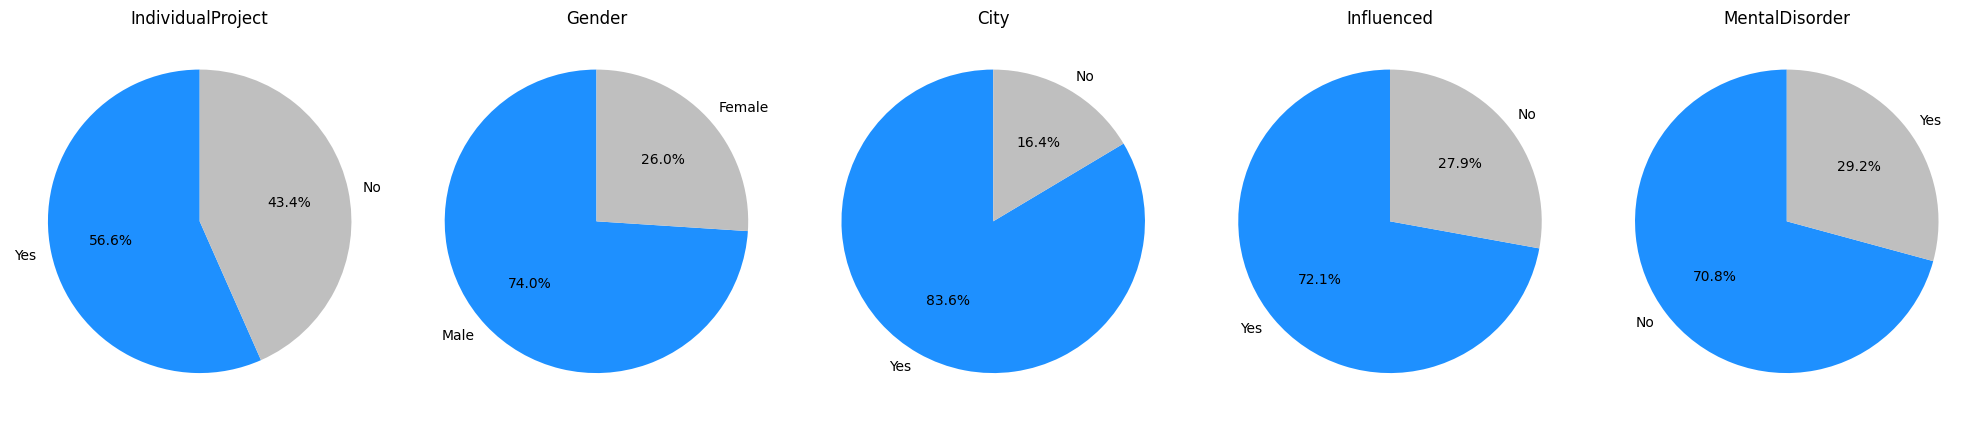

In [9]:
# Kolom
cols = ['IndividualProject', 'Gender', 'City', 'Influenced', 'MentalDisorder']

# set up grid untuk pie plot
fig, axs = plt.subplots(1, len(cols), figsize=(20, 6))

# fungsi untuk pie plot
def plot_pie_chart(col, ax):
    data = df[col].value_counts(normalize=True) * 100
    max_index = data.idxmax()
    colors = ['#1e90ff' if idx == max_index else '#bfbfbf' for idx in data.index]
    data.plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=ax, colors=colors)
    ax.set_title(f'{col}')
    ax.set_ylabel('')

for i, col in enumerate(cols):
    plot_pie_chart(col, axs[i])

plt.tight_layout()
plt.show()

Berdasarkan visualisasi pie plot diatas, dapat diketahui bahwa:
1. Pada **IndividualProject** menunjukkan persentase mahasiswa yang memiliki project individu atau tidak. Sebanyak 56.6% mahasiswa memiliki project individu dan sebanyak 43.4% mahasiswa tidak memiliki project individu.
2. Pada **Gender** menunjukkan persentase jenis kelamin mahasiswa. Sebanyak 74.0%  mahasiswa pria dan sebanyak 26.0% mahasiswa wanita.
3. Pada **City** menunjukkan persentase mahasiswa yang tinggal di kota atau tidak. Sebanyak 83.6% mahasiswa tinggal di kota dan sebanyak 16.4% mahasiswa tidak tinggal di kota.
4. Pada **Influenced** menunjukkan persentase mahasiswa yang mudah terpengaruh atau tidak. Sebanyak 72.1% mahasiswa mudah terpengaruh dan sebanyak 27.9% mahasiswa tidak mudah terpengaruh.
5. Pada **MentalDisorder** menunjukkan persentase mahasiswa yang menderita penyakit mental atau tidak. Sebanyak 70.8% mahasiswa tidak menderita penyakit mental dan sebanyak 29.2% mahasiswa menderita penyakit mental.

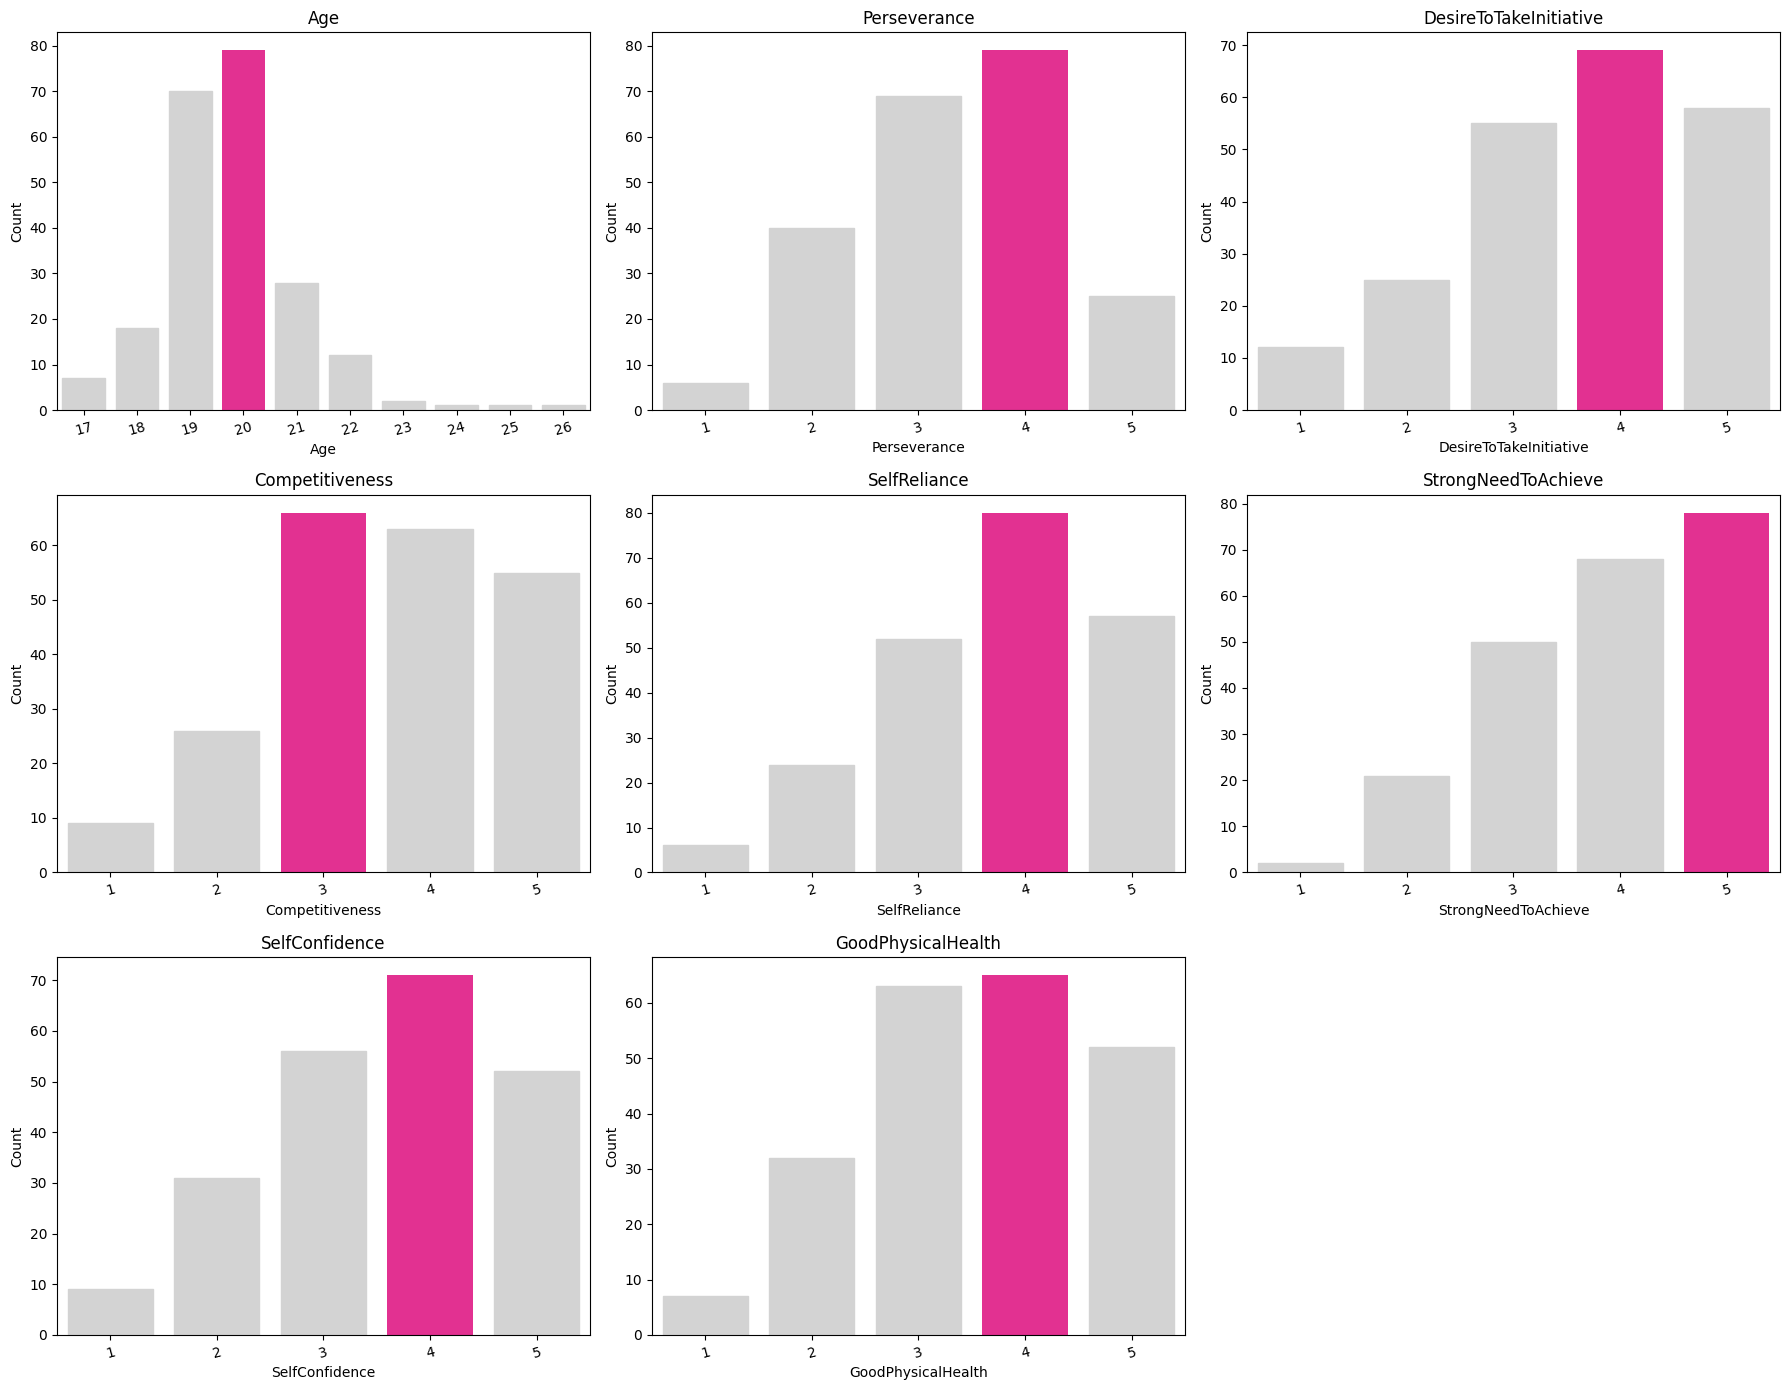

In [10]:
fig, axs = plt.subplots(3, 3, figsize=(18, 14))
axs = axs.flatten()

# kolom numerik
numerical_cols = [
    'Age', 'Perseverance', 'DesireToTakeInitiative',
    'Competitiveness', 'SelfReliance', 'StrongNeedToAchieve',
    'SelfConfidence', 'GoodPhysicalHealth'
]

# membuat count plot dari kolom numerik
for i, col in enumerate(numerical_cols):
    ax = axs[i]
    sns.countplot(data=df, x=col, ax=ax, color='deeppink')
    ax.set_title(f'{col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=15)

    for bar in ax.patches:
        if bar.get_height() == df[col].value_counts().max():
            continue
        bar.set_color('lightgrey')

fig.delaxes(axs[-1])

plt.tight_layout()
plt.show()

Berdasarkan visualisasi count plot diatas, dapat diketahui bahwa:
1. Dari visualisasi pada **Age** terdapat sejumlah umur-umur mahasiswa, yaitu 17 tahun, 18 tahun, 19 tahun, 20 tahun, 21 tahun, 22 tahun, 23 tahun, 24 tahun, 25 tahun, dan 26 tahun dengan mayoritas mahasiswa berumur 20 tahun.
2. Dari visualisasi pada **Perseverance** terdapat tingkat ukuran ketekunan mahasiswa dari 1 hingga 5 dengan mayoritas mahasiswa memiliki tingkat ketekunan sebesar 4.
3. Dari visualisasi pada **DesireToTakeInitiative** terdapat tingkat ukuran inisiatif mahasiswa dari 1 hingga 5 dengan mayoritas mahasiswa memiliki tingkat ketekunan sebesar 4.
4. Dari visualisasi pada **Competitiveness** terdapat tingkat ukuran kompetitif/daya saing mahasiswa dari 1 hingga 5 dengan mayoritas mahasiswa memiliki tingkat ketekunan sebesar 3.
5. Dari visualisasi pada **SelfReliance** terdapat tingkat ukuran kemandirian mahasiswa dari 1 hingga 5 dengan mayoritas mahasiswa memiliki tingkat ketekunan sebesar 4.
6. Dari visualisasi pada **StrongNeedToAchieve** terdapat tingkat ukuran keinginan mahasiswa untuk berhasil mencapai tujuan mereka dari 1 hingga 5 dengan mayoritas mahasiswa memiliki tingkat ketekunan sebesar 5.
7. Dari visualisasi pada **SelfConfidence** terdapat tingkat ukuran kepercayaan diri mahasiswa dari 1 hingga 5 dengan mayoritas mahasiswa memiliki tingkat ketekunan sebesar 4.
8. Dari visualisasi pada **GoodPhysicalHealth** terdapat tingkat ukuran kondisi kesehatan fisik mahasiswa dari 1 hingga 5 dengan mayoritas mahasiswa memiliki tingkat ketekunan sebesar 4.

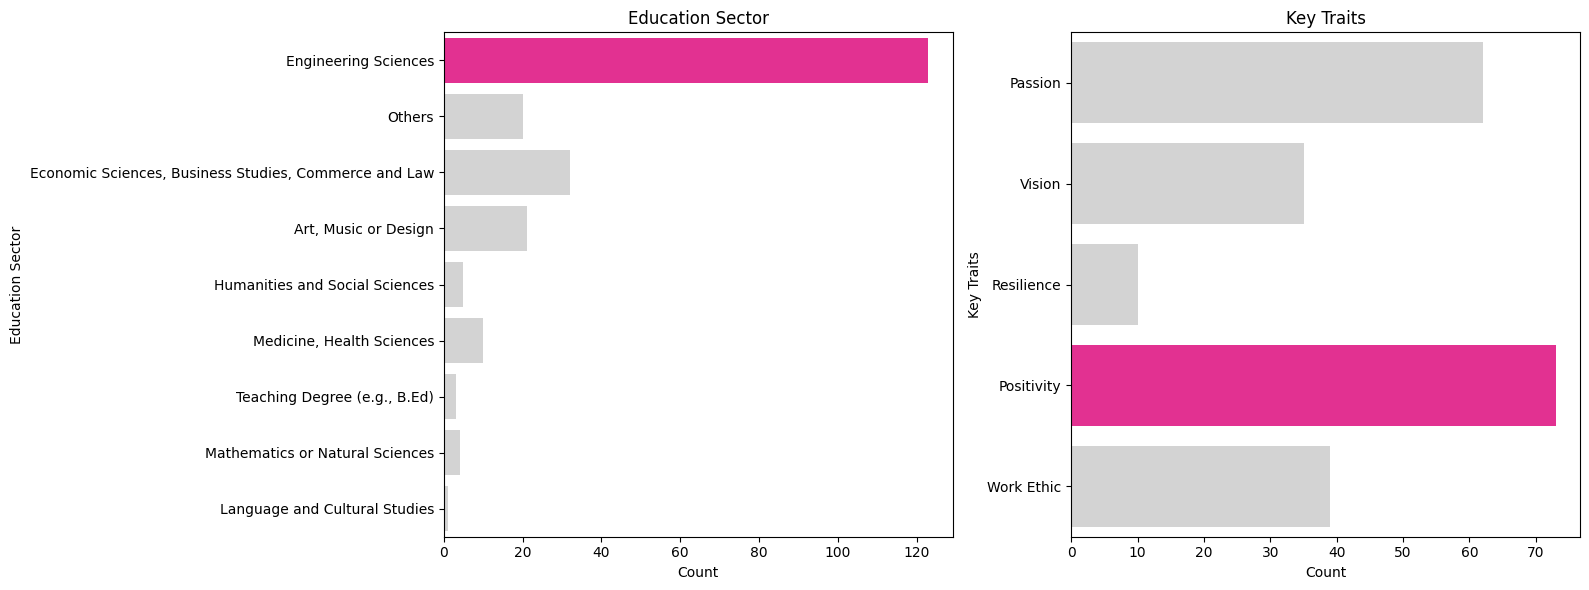

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# kolom
edu_categories = df['EducationSector'].unique()
traits_categories = df['KeyTraits'].unique()

# palette warna
edu_palette = ['deeppink' if x == edu_categories[0] else 'lightgrey' for x in edu_categories]
traits_palette = ['deeppink' if x == traits_categories[3] else 'lightgrey' for x in traits_categories]

# count plot education sector
sns.countplot(data=df, y='EducationSector', hue='EducationSector', ax=axs[0], palette=edu_palette, legend=False)
axs[0].set_title('Education Sector')
axs[0].set_ylabel('Education Sector')
axs[0].set_xlabel('Count')

# count plot key traits
sns.countplot(data=df, y='KeyTraits', hue='KeyTraits', ax=axs[1], palette=traits_palette, legend=False)
axs[1].set_title('Key Traits')
axs[1].set_ylabel('Key Traits')
axs[1].set_xlabel('Count')

plt.tight_layout()
plt.show()


Berdasarkan visualisasi count plot diatas, dapat diketahui bahwa:
1. Dari visualisasi pada **EducationSector** terdapat sejumlah sektor pendidikan yang mencakup kategori atau bidang studi yang diambil oleh mahasiswa dengan mayoritas bidang studi yang diambil oleh mahasiswa adalah Engineering Sciences.
2. Dari visualisasi pada **KeyTraits** terdapat sejumlah kategori karakteristik utama yang dimiliki mahasiswa dengan mayoritas karakteristik yang dimiliki mahasiswa adalah positivity.

#### **Comparison**

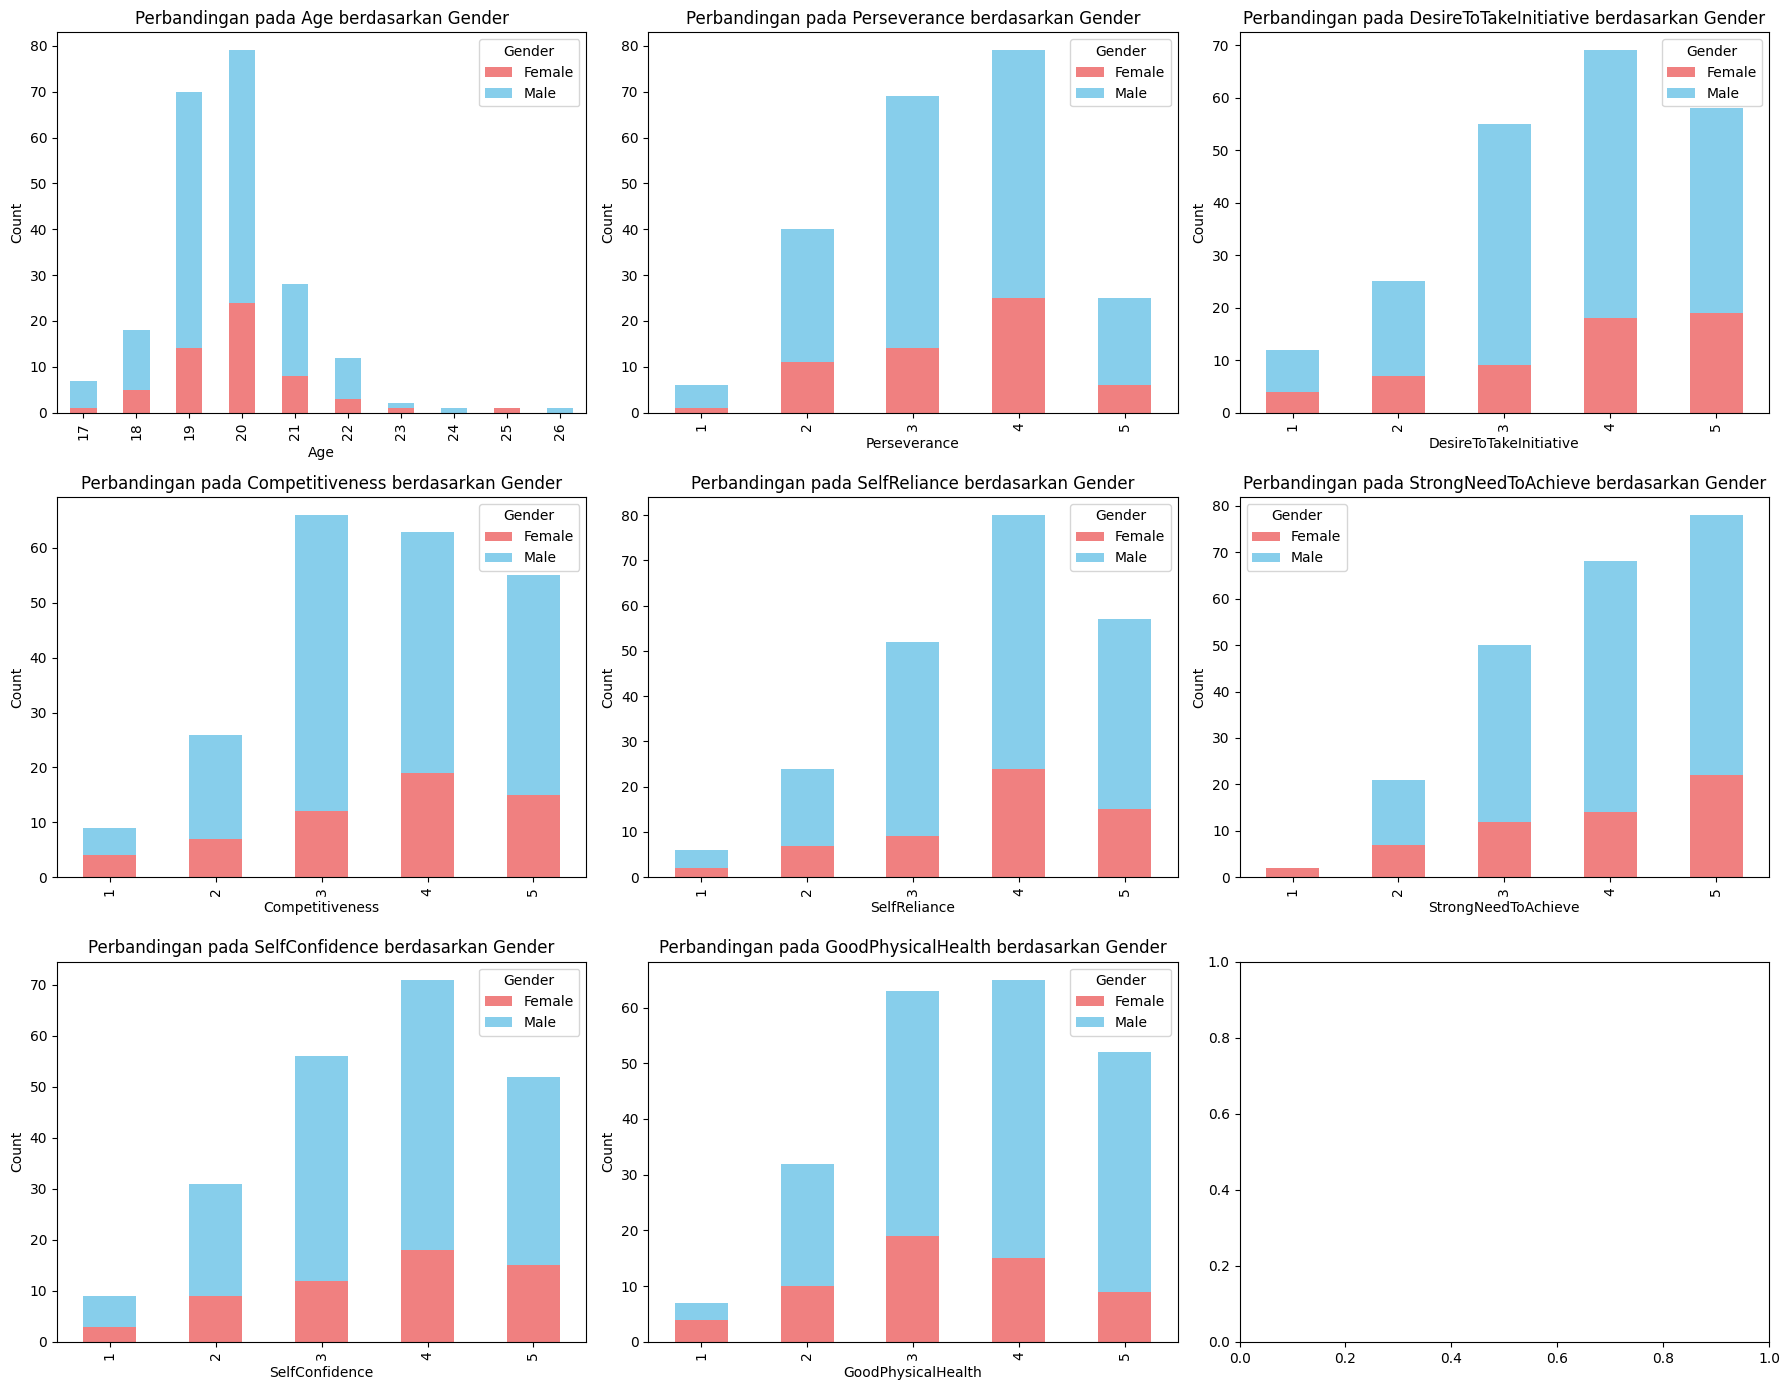

In [12]:
fig, axs = plt.subplots(3, 3, figsize=(18, 14))

numerical_cols = [
    'Age', 'Perseverance', 'DesireToTakeInitiative',
    'Competitiveness', 'SelfReliance', 'StrongNeedToAchieve',
    'SelfConfidence', 'GoodPhysicalHealth'
]

for i, col in enumerate(numerical_cols):
    ax = axs[i // 3, i % 3]
    grouped_data = df.groupby([col, 'Gender'])[col].count().unstack(fill_value=0)
    grouped_data.plot(kind='bar', stacked=True, ax=ax, color=['lightcoral', 'skyblue'])
    ax.set_title(f'Perbandingan pada {col} berdasarkan Gender')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()


Berdasarkan visualisasi perbandingan diatas, dapat diketahui bahwa:
1. Dari hasil visualisasi **perbandingan pada age berdasarkan gender**, dapat menarik kesimpulan bahwa populasi mahasiswa pria lebih dominan dibandingkan mahasiswa wanita di semua tingkat umur yang ditampilkan, kecuali pada umur 23 tahun dan 25 tahun.
2. Dari hasil visualisasi **perbandingan pada perseverance berdasarkan gender**, dapat menarik kesimpulan bahwa populasi mahasiswa pria lebih dominan dibandingkan mahasiswa wanita di semua tingkat ketekunan yang ditampilkan. Mahasiswa pria memiliki persentase lebih tinggi di setiap kategori tingkat ketakunan dibandingkan wanita.
3. Dari hasil visualisasi **perbandingan pada desiretitakeinitiative berdasarkan gender**, dapat menarik kesimpulan bahwa populasi mahasiswa pria lebih dominan dibandingkan mahasiswa wanita di semua tingkat inisiatif yang ditampilkan. Mahasiswa pria memiliki persentase lebih tinggi di setiap kategori tingkat inisiatif dibandingkan wanita.
4. Dari hasil visualisasi **perbandingan pada competitiveness berdasarkan gender**, dapat menarik kesimpulan bahwa populasi mahasiswa pria lebih dominan dibandingkan mahasiswa wanita di semua tingkat kompetitif yang ditampilkan. Mahasiswa pria memiliki persentase lebih tinggi di setiap kategori tingkat kompetitif dibandingkan wanita.
5. Dari hasil visualisasi **perbandingan pada selfreliance berdasarkan gender**, dapat menarik kesimpulan bahwa populasi mahasiswa pria lebih dominan dibandingkan mahasiswa wanita di semua tingkat kemandirian yang ditampilkan. Mahasiswa pria memiliki persentase lebih tinggi di setiap kategori tingkat kemandirian dibandingkan wanita.
6. Dari hasil visualisasi **perbandingan pada strongneedtoachieve berdasarkan gender**, dapat menarik kesimpulan bahwa populasi mahasiswa pria lebih dominan dibandingkan mahasiswa wanita di semua tingkat keinginan mahasiswa untuk berhasil mencapai tujuan mereka. Mahasiswa pria memiliki persentase lebih tinggi di setiap kategori tingkat keinginan mahasiswa untuk berhasil mencapai tujuan mereka dibandingkan wanita.
7. Dari hasil visualisasi **perbandingan pada selconfidence berdasarkan gender**, dapat menarik kesimpulan bahwa populasi mahasiswa pria lebih dominan dibandingkan mahasiswa wanita di semua tingkat kepercayaan diri yang ditampilkan. Mahasiswa pria memiliki persentase lebih tinggi di setiap kategori tingkat kepercayaan diri dibandingkan wanita.
8. Dari hasil visualisasi **perbandingan pada goodphysicalhealth berdasarkan gender**, dapat menarik kesimpulan bahwa populasi mahasiswa pria lebih dominan dibandingkan mahasiswa wanita di semua tingkat kesehatan fisik yang ditampilkan. Mahasiswa pria memiliki persentase lebih tinggi di setiap kategori tingkat kesehatan fisik dibandingkan wanita.


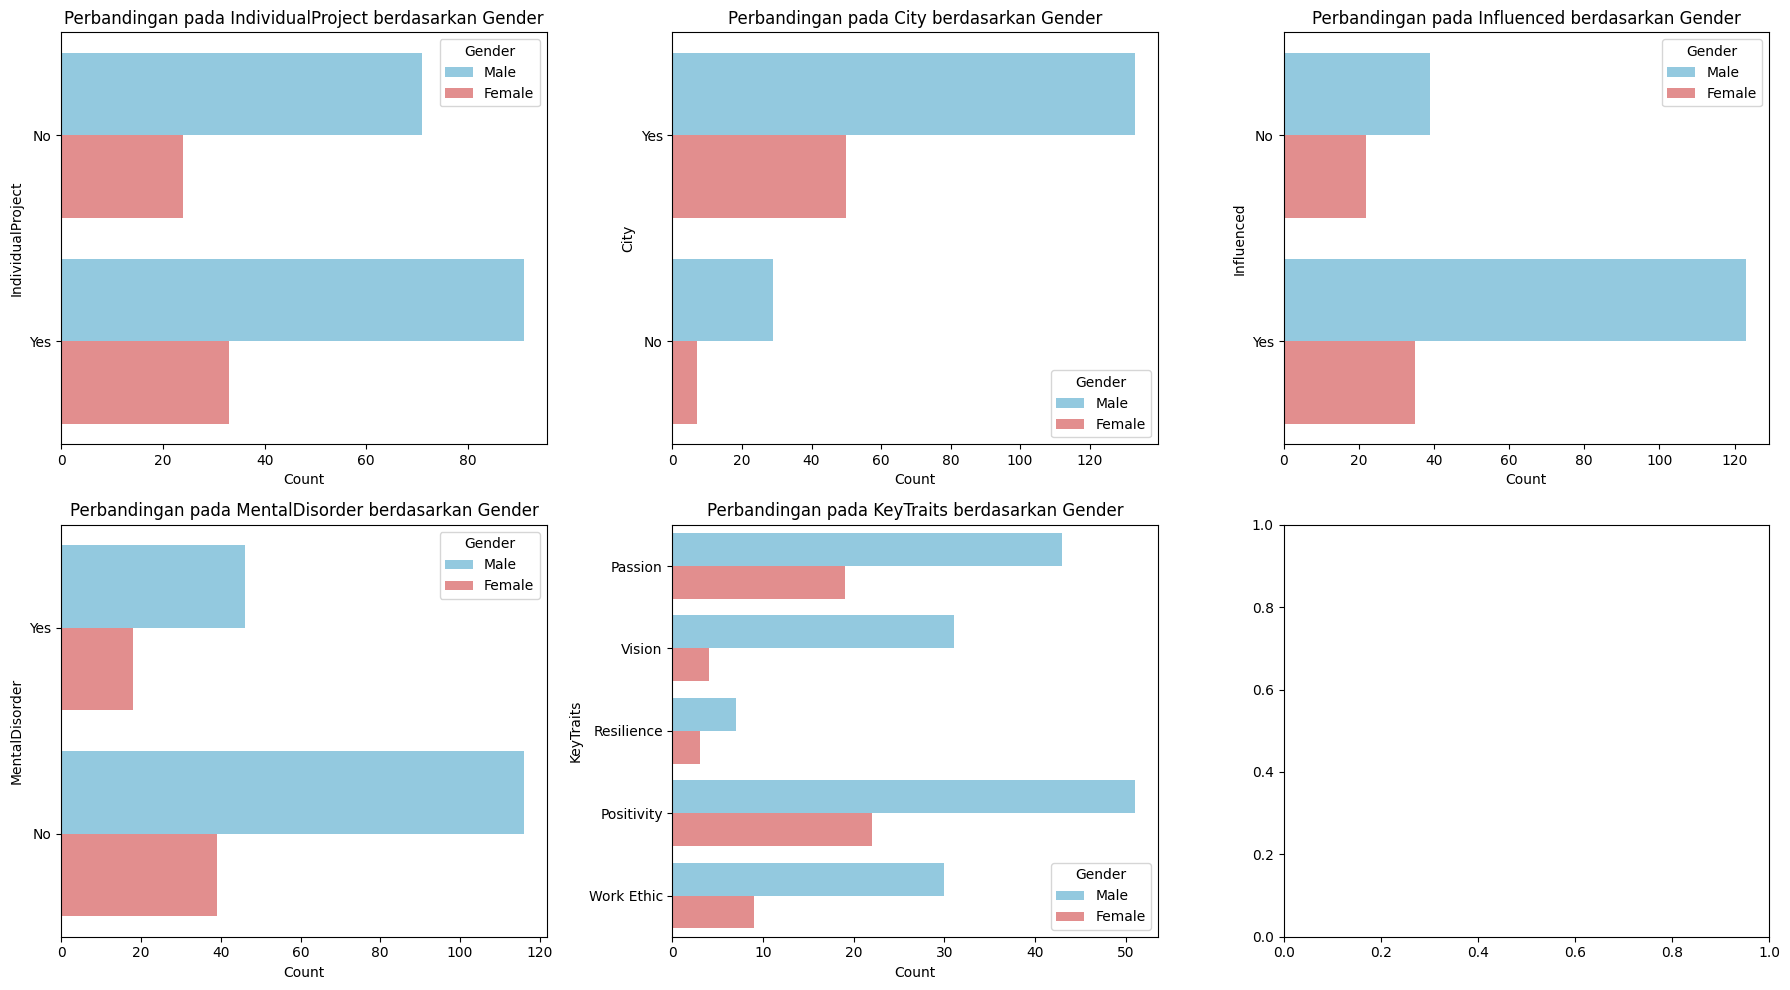

In [13]:
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
axs = axs.flatten()

categorical_cols = ['IndividualProject', 'City', 'Influenced', 'MentalDisorder', 'KeyTraits']

gender_colors = {'Male': 'skyblue', 'Female': 'lightcoral'}

for i, col in enumerate(categorical_cols):
    ax = axs[i]
    sns.countplot(data=df, y=col, hue='Gender', ax=ax, palette=gender_colors)
    ax.set_title(f'Perbandingan pada {col} berdasarkan Gender')
    ax.set_ylabel(col)
    ax.set_xlabel('Count')

plt.tight_layout()
plt.show()


Berdasarkan visualisasi perbandingan diatas, dapat diketahui bahwa:
1. Dari hasil visualisasi **perbandingan pada individualproject berdasarkan gender**, dapat menarik kesimpulan bahwa mayoritas mahasiswa pria memiliki individual project dan tidak memiliki individual project dibandingkan mahasiswa wanita.
2. Dari hasil visualisasi **perbandingan pada city berdasarkan gender**, dapat menarik kesimpulan bahwa mayoritas mahasiswa pria tinggal di kota dan tidak tinggal di kota dibandingkan mahasiswa wanita.
3. Dari hasil visualisasi **perbandingan pada influenced berdasarkan gender**, dapat menarik kesimpulan bahwa mayoritas mahasiswa pria mudah untuk terpengaruh dan tidak terpengaruh dibandingkan mahasiswa wanita.
4. Dari hasil visualisasi **perbandingan pada mentaldisorder berdasarkan gender**, dapat menarik kesimpulan bahwa mayoritas mahasiswa pria menderita penyakit mental dan tidak menderita penyakit mental dibandingkan mahasiswa wanita.
5. Dari hasil visualisasi **perbandingan pada keytraits berdasarkan gender**, dapat menarik kesimpulan bahwa mayoritas mahasiswa pria pada tiap kategori karakteristik utama mahasiswa dibandingkan mahasiswa wanita.

#### **Relationship**

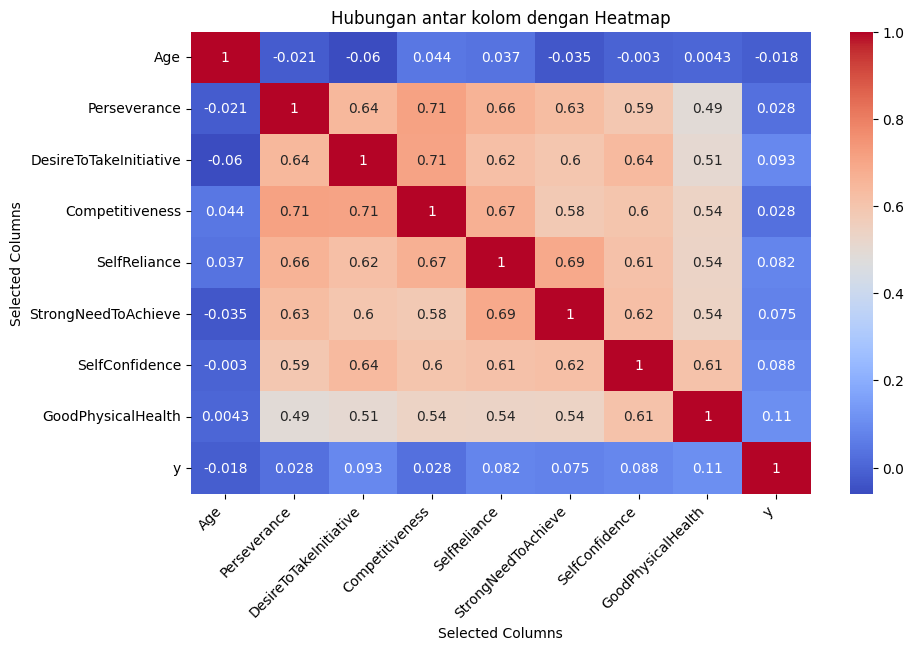

In [14]:
numerical_columns = df.select_dtypes(include=[np.number]).columns

if len(numerical_columns) < 2:
    print("Error: At least two numerical columns are required for heatmap generation.")
else:
    correlation_matrix = df[numerical_columns].corr()

    plt.figure(figsize=(10, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

    plt.xlabel("Selected Columns")
    plt.ylabel("Selected Columns")
    plt.title("Hubungan antar kolom dengan Heatmap")

    plt.xticks(rotation=45, ha="right")

    plt.show()

Berdasarkan heatmap diatas, terlihat beberapa hubungan yang kuat antara variabel-variabel tersebut. Berikut adalah beberapa interpretasi yang dapat dibuat:

* Perseverance dan Self-Confidence: Hubungan yang kuat dan positif menunjukkan bahwa orang yang gigih cenderung memiliki kepercayaan diri yang tinggi.
* Perseverance dan Competitiveness: Hubungan yang kuat di antara keduanya menunjukkan bahwa mahasiswa yang memiliki ketekunan cenderung lebih kompetitif, karena ketekunan dapat meningkatkan daya saing.
* Perseverance dan DesireToTakeInitiative: Hubungan positif antara ketekunan dan inisiatif menunjukkan bahwa mahasiswa yang gigih memiliki kecenderungan untuk lebih proaktif dalam mengambil tindakan.
* Desire To Take Initiative dan Competitiveness: Hubungan yang kuat dan positif menunjukkan bahwa orang yang memiliki keinginan untuk mengambil inisiatif cenderung memiliki daya saing yang tinggi.
* Self-Reliance dan Strong Need To Achieve: Hubungan yang kuat dan positif menunjukkan bahwa orang yang mandiri cenderung memiliki kebutuhan yang kuat untuk mencapai sesuatu.
* Good Physical Health dan Self-Confidence: Hubungan yang kuat dan positif menunjukkan bahwa orang yang memiliki kesehatan fisik yang baik cenderung memiliki kepercayaan diri yang tinggi.
* SelfConfidence dan Competitiveness: Kepercayaan diri memiliki korelasi positif yang cukup kuat dengan daya saing, menunjukkan bahwa individu dengan tingkat kepercayaan diri tinggi biasanya juga lebih kompetitif.

#### **Distribution**

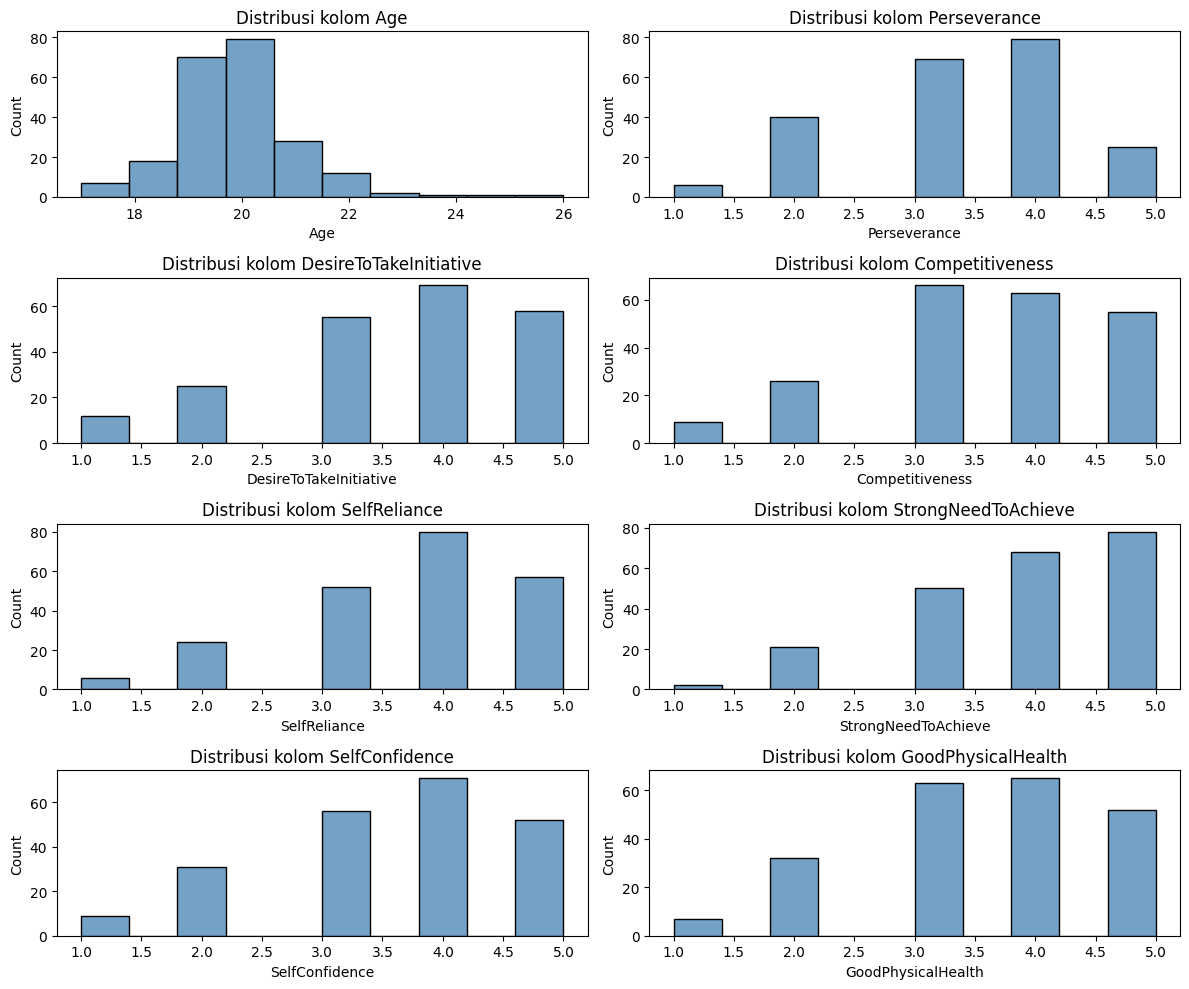

In [15]:
fig, axs = plt.subplots(4, 2, figsize=(12, 10))
fig.tight_layout(pad=2.0)

numeric_cols = [
    'Age', 'Perseverance', 'DesireToTakeInitiative',
    'Competitiveness', 'SelfReliance', 'StrongNeedToAchieve',
    'SelfConfidence', 'GoodPhysicalHealth'
]

for i, col in enumerate(numeric_cols):
    ax = axs[i // 2, i % 2]
    sns.histplot(df[col], kde=False, ax=ax, color='steelblue', bins=10)
    ax.set_title(f'Distribusi kolom {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()


Di atas adalah histogram yang menunjukkan distribusi dari variabel numerik dalam dataset "Entrepreneurial Competency in University Students." Berikut adalah insight yang bisa diambil:

1. Age (Usia): Usia mahasiswa umumnya berada dalam rentang 17 hingga 26 tahun, dengan sebagian besar di usia 18 hingga 21 tahun.
2. Perseverance (Ketekunan):Tingkat ketekunan mayoritas mahasiswa berkisar antara nilai 3 hingga 4.
3. DesireToTakeInitiative (Inisiatif):Sebagian besar mahasiswa memiliki tingkat inisiatif antara 3 hingga 5.
4. Competitiveness (Daya Saing): Daya saing mahasiswa umumnya berkisar antara 3 hingga 4.
5. SelfReliance (Kemandirian): Kemandirian mahasiswa sebagian besar berada pada nilai 3 dan 4.
6. StrongNeedToAchieve (Keinginan Kuat untuk Mencapai): Keinginan kuat untuk mencapai tujuan umumnya berada antara nilai 4 hingga 5.
7. SelfConfidence (Kepercayaan Diri): Tingkat kepercayaan diri mahasiswa sebagian besar berada pada rentang 3 hingga 4.
8. GoodPhysicalHealth (Kesehatan Fisik): Kesehatan fisik mahasiswa umumnya berada di nilai 3 hingga 4.

### **Verify Data Quality**

#### **Missing Values**

In [16]:
missing_values = df.isna().sum()
print(f"Jumlah data kosong:")
missing_values

Jumlah data kosong:


EducationSector            0
IndividualProject          0
Age                        0
Gender                     0
City                       0
Influenced                 0
Perseverance               0
DesireToTakeInitiative     0
Competitiveness            0
SelfReliance               0
StrongNeedToAchieve        0
SelfConfidence             0
GoodPhysicalHealth         0
MentalDisorder             0
KeyTraits                  0
ReasonsForLack            91
y                          0
dtype: int64

Setelah dilakukan pengecekkan missing values seperti diatas, di dapatkan hasil bahwa dalam dataset ini terdapat satu kolom yang record datanya null atau kosong, sehingga perlu dilakukan sebuah penanganan.

#### **Outliers Values**

In [17]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

display(results_df)

Kolom,Persentase Outliers
Age,10.958904
Perseverance,2.739726
DesireToTakeInitiative,0.000000
Competitiveness,0.000000
SelfReliance,0.000000
StrongNeedToAchieve,0.000000
SelfConfidence,4.109589
GoodPhysicalHealth,3.196347
y,0.000000


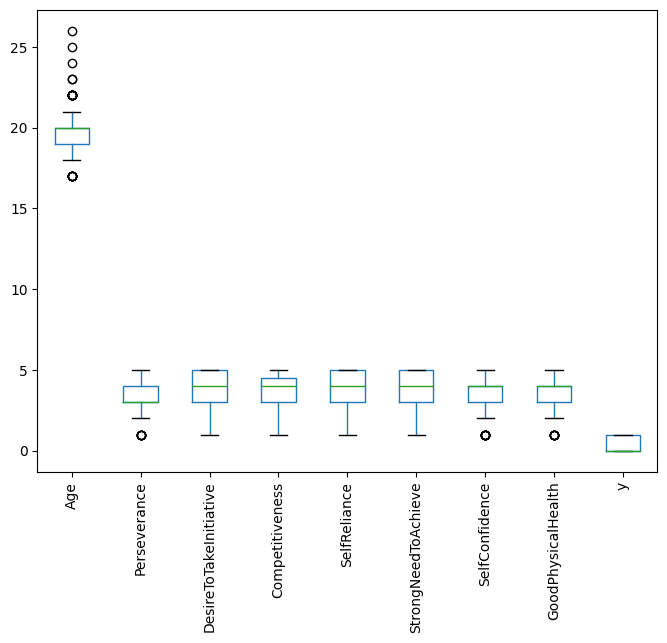

In [18]:
boxplot = df.boxplot(grid=False, rot=90,  figsize=(8,6))

Setelah dilakukan pengecekkan outliers values seperti diatas, di dapatkan hasil bahwa pada dataset ini terdapat sejumlah outliers pada 4 kolom, yaitu Age, Perseverance, SelfConfidence, dan GoodPhysicalHealth. Dengan demikian, perlu dilakukan penanganan outliers agar kualitas data yang dianalisis menjadi lebih baik dan lebih akurat.

#### **Duplicated Values**

In [19]:
df[df.duplicated()]

,EducationSector,IndividualProject,Age,Gender,City,Influenced,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,StrongNeedToAchieve,SelfConfidence,GoodPhysicalHealth,MentalDisorder,KeyTraits,ReasonsForLack,y


Setelah dilakukan pengecekkan duplicated values seperti diatas, di dapatkan hasil bahwa dalam dataset ini tidak terdapat nilai yang terduplikasi sehingga tidak perlu dilakukan penanganan.

#### **Inconsistent Values / Noise**

In [20]:
# Memeriksa tipe data setiap kolom
column_types = df.dtypes

print("Tipe data setiap kolom:")
print(column_types)

# Identifikasi kolom yang mungkin memiliki tipe data yang tidak sesuai
inconsistent_types = column_types[column_types.apply(lambda x: x not in ["int64", "float64", "object"])]

if inconsistent_types.empty:
    print("Tidak ada tipe data yang tidak cocok atau data noise.")
else:
    print("Kolom dengan tipe data yang tidak cocok:")
    print(inconsistent_types)

Tipe data setiap kolom:
EducationSector           object
IndividualProject         object
Age                        int64
Gender                    object
City                      object
Influenced                object
Perseverance               int64
DesireToTakeInitiative     int64
Competitiveness            int64
SelfReliance               int64
StrongNeedToAchieve        int64
SelfConfidence             int64
GoodPhysicalHealth         int64
MentalDisorder            object
KeyTraits                 object
ReasonsForLack            object
y                          int64
dtype: object
Tidak ada tipe data yang tidak cocok atau data noise.


Setelah dilakukan pengecekan inconsistent values dengan mengecek tipe data yang tidak sesuai, di dapatkan hasil bahwa tidak terdapat nilai yang inconsistent, sehingga tidak perlu dilakukan penanganan.

## **DATA PREPARATION**

### **Data Reduction**

#### **Mengurangi Fitur - Fitur Yang Kurang Relevan**

In [21]:
df = df.drop(['IndividualProject', 'MentalDisorder',  'ReasonsForLack'], axis=1)

Pada tahap data reduction ini dilakukan proses pengurangan fitur-fitur yang kurang relevan dan tidak digunakan dalam analisis ini, sehingga dilakukan  penghapusan kolom dari dataset yang digunakan. Kolom yang dihapus ada 3, yaitu 'IndividualProject', 'MentalDisorder', dan 'ReasonsForLack'. Alasan dilakukannya penghapusan kolom tersebut adalah sebagai berikut:

1. **'IndividualProject'** : Kolom ini menunjukkan bahwa mahasiswa pernah mengikuti project individu atau tidak. Proyek individu tidak membahas spesifik mengenai wirausaha, sehingga kurang relevan digunakan.
2. **'MentalDisorder'** : Kolom ini menunjukkan apakah seseorang memiliki gangguan mental dan analisis yang dilakukan tidak mencakup aspek kesehatan, sehingga kolom ini tidak digunakan.
3. **'ReasonsForLack'** : Pada kolom ini hanya mencatat alasan kurangnya ketertarikan menjadi wirausahawan. Analisis yang dilakukan fokus pada faktor positif yang mempengaruhi minat berwirausaha, sehingga kolom ini kurang relevan.

#### **Pengecekkan Hasil**

In [22]:
df.head()

,EducationSector,Age,Gender,City,Influenced,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,StrongNeedToAchieve,SelfConfidence,GoodPhysicalHealth,KeyTraits,y
0,Engineering Sciences,19,Male,Yes,No,2,2,3,3,2,2,3,Passion,1
1,Engineering Sciences,22,Male,No,Yes,3,3,3,4,4,3,4,Vision,0
2,Engineering Sciences,18,Male,Yes,No,3,4,3,3,3,4,4,Passion,0
3,Engineering Sciences,20,Male,Yes,Yes,3,3,3,3,4,3,3,Resilience,0
4,Engineering Sciences,19,Male,Yes,Yes,2,3,3,3,4,3,2,Vision,1


Setelah dilakukan pengurangan fitur-fitur yang kurang relevan dan tidak dibutuhkan dalam analisis ini, ditampilkan hasil seperti pada diatas. Jadi, jumlah kolom yang digunakan dalam analisis ini adalah sejumlah 14 kolom.

### **Data Cleaning**

#### **Missing Values**

In [23]:
missing_values = df.isna().sum()
print(f"Jumlah data kosong:")
missing_values

Jumlah data kosong:


EducationSector           0
Age                       0
Gender                    0
City                      0
Influenced                0
Perseverance              0
DesireToTakeInitiative    0
Competitiveness           0
SelfReliance              0
StrongNeedToAchieve       0
SelfConfidence            0
GoodPhysicalHealth        0
KeyTraits                 0
y                         0
dtype: int64

Dapat dilihat dari hasil pengecekan kembali missing values bahwa tidak terdapat missing values, sehingga tidak perlu dilakukan penanganan lebih lanjut terkait missing values.

#### **Outliers Values**

In [24]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

display(results_df)

Kolom,Persentase Outliers
Age,10.958904
Perseverance,2.739726
DesireToTakeInitiative,0.000000
Competitiveness,0.000000
SelfReliance,0.000000
StrongNeedToAchieve,0.000000
SelfConfidence,4.109589
GoodPhysicalHealth,3.196347
y,0.000000


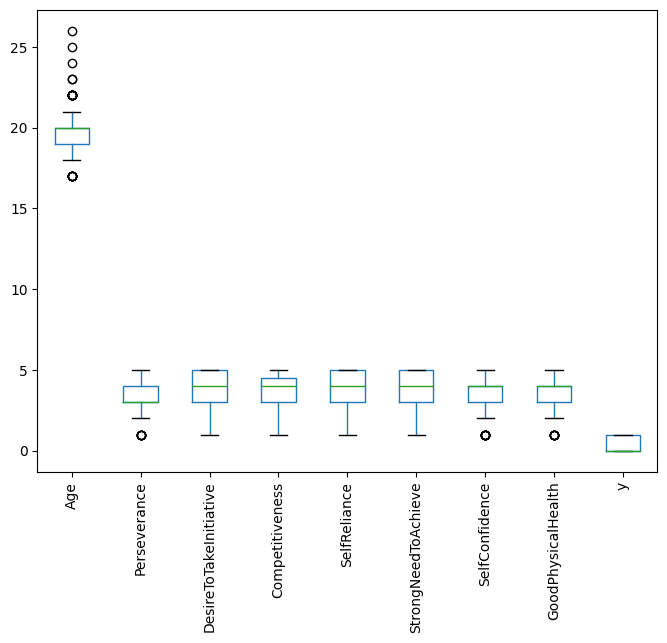

In [25]:
boxplot = df.boxplot(grid=False, rot=90,  figsize=(8,6))

Dapat dilihat dari hasil pengecekan outliers values bahwa terdapat beberapa kolom yang memiliki outliers yang persentasenya dibawah 10%. Sehingga, perlu dilakukan penanganan outliers values tersebut. Metode penanganan yang digunakan dalam dataset ini adalah menangani outliers dengan mengganti outliers dengan nilai median dari data dalam rentang Interquartile Range (IQR).

##### **Penanganan Outliers Values**

In [26]:
data = df

# Daftar kolom yang ingin diubah outliers-nya
columns_to_modify = ["Perseverance", "SelfConfidence", "GoodPhysicalHealth"]

# Fungsi untuk mengubah outliers dengan nilai median
def replace_outliers_with_median(data, columns):
    # Perulangan pada tiap kolom yang ditentukan
    for column in columns:
        # Menghitung IQR
        Q1 = data[column].quantile(0.25)  # kuartil pertama
        Q3 = data[column].quantile(0.75)  # kuartil ketiga
        IQR = Q3 - Q1  # jarak interkuartil

        # Batas atas dan bawah
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Median dari data dalam batas IQR
        median = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)][column].median()

        # Ganti outliers dengan median
        data[column] = data[column].apply(lambda x: median if x < lower_bound or x > upper_bound else x)

    return data

# Ganti outliers dalam kolom yang ditentukan
data_replaced = replace_outliers_with_median(data, columns_to_modify)


##### **Hasil Setelah Dilakukan Penanganan**

In [27]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

display(results_df)

Kolom,Persentase Outliers
Age,10.958904
Perseverance,0.000000
DesireToTakeInitiative,0.000000
Competitiveness,0.000000
SelfReliance,0.000000
StrongNeedToAchieve,0.000000
SelfConfidence,0.000000
GoodPhysicalHealth,0.000000
y,0.000000


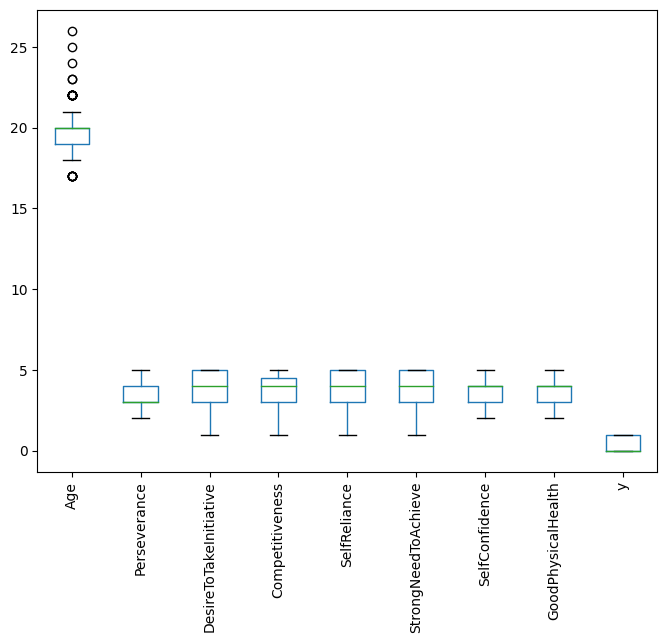

In [28]:
boxplot = df.boxplot(grid=False, rot=90,  figsize=(8,6))

Setelah dilakukan penanganan outliers values dengan mengganti outliers dengan nilai median dari data dalam rentang Interquartile Range (IQR) didapatkan hasil bahwa kolom-kolom pada dataset tidak terdapat lagi outliers values.

#### **Duplicated Values**

In [29]:
df[df.duplicated()]

,EducationSector,Age,Gender,City,Influenced,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,StrongNeedToAchieve,SelfConfidence,GoodPhysicalHealth,KeyTraits,y


Dapat dilihat dari hasil pengecekan kembali duplicated values bahwa tidak terdapat duplicated values, sehingga tidak perlu dilakukan penanganan lebih lanjut terkait duplicated values.

#### **Inconsistent Values / Noise**

In [30]:
# Memeriksa tipe data setiap kolom
column_types = df.dtypes

print("Tipe data setiap kolom:")
print(column_types)

# Identifikasi kolom yang mungkin memiliki tipe data yang tidak sesuai
inconsistent_types = column_types[column_types.apply(lambda x: x not in ["int64", "float64", "object"])]

if inconsistent_types.empty:
    print("Tidak ada tipe data yang tidak cocok atau data noise.")
else:
    print("Kolom dengan tipe data yang tidak cocok:")
    print(inconsistent_types)

Tipe data setiap kolom:
EducationSector            object
Age                         int64
Gender                     object
City                       object
Influenced                 object
Perseverance              float64
DesireToTakeInitiative      int64
Competitiveness             int64
SelfReliance                int64
StrongNeedToAchieve         int64
SelfConfidence            float64
GoodPhysicalHealth        float64
KeyTraits                  object
y                           int64
dtype: object
Tidak ada tipe data yang tidak cocok atau data noise.


Dapat dilihat dari hasil pengecekan kembali inconsistent values bahwa tidak terdapat inconsistent valuess, sehingga tidak perlu dilakukan penanganan lebih lanjut terkait inconsistent values.

### **Data Transformation**

##### **Mapping**

In [31]:
df['EducationSector'] = df['EducationSector'].map({'Engineering Sciences':0,'Economic Sciences, Business Studies, Commerce and Law':1,
                                                   'Art, Music or Design':2, 'Humanities and Social Sciences':3, 'Medicine, Health Sciences':4,
                                                   'Teaching Degree (e.g., B.Ed)':5, 'Mathematics or Natural Sciences':6,
                                                   'Language and Cultural Studies':7, 'Others':8})
df['Gender'] = df['Gender'].map({'Male':0,'Female':1})
df['Influenced'] = df['Influenced'].map({'No':0,'Yes':1})
df['City'] = df['City'].map({'No':0,'Yes':1})

Dari dataframe yang dianalisis, perlu dilakukan transformasi data dengan melakukan proses mapping. Mapping ini dilakukan untuk mengubah kolom kategorikal menjadi numerik guna memudahkan dalam melakukan analisis kedepannya. Kolom kategorikal yang diubah menjadi numerik ada 3, yaitu sebagai berikut:

1. **"EducationSector"** : data pada EducationSector di representasikan dengan angka [0] sebagai Engineering Sciences [1] sebagai Economic Sciences, Business Studies, Commerce and Law [2] sebagai Art, Music or Design [3] sebagai Humanities and Social Sciences [4] sebagai Medicine, Health Sciences [5] sebagai Teaching Degree (e.g., B.Ed) [6] sebagai Mathematics or Natural Sciences [7] sebagai Language and Cultural Studies d[8] sebagai Others.
2. **"Gender"** : data pada Gender di representasikan dengan angka [0] sebagai Male [1] sebagai Female.
3. **"Influenced"** : data pada Influenced di representasikan dengan angka [0] sebagai No [1] sebagai Yes.
4. **"City"** : data pada City di representasikan dengan angka [0] sebagai No [1] sebagai Yes.

###### **Hasil Mapping**

In [32]:
df.head()

,EducationSector,Age,Gender,City,Influenced,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,StrongNeedToAchieve,SelfConfidence,GoodPhysicalHealth,KeyTraits,y
0,0,19,0,1,0,2.0,2,3,3,2,2.0,3.0,Passion,1
1,0,22,0,0,1,3.0,3,3,4,4,3.0,4.0,Vision,0
2,0,18,0,1,0,3.0,4,3,3,3,4.0,4.0,Passion,0
3,0,20,0,1,1,3.0,3,3,3,4,3.0,3.0,Resilience,0
4,0,19,0,1,1,2.0,3,3,3,4,3.0,2.0,Vision,1


Hasil diatas adalah hasil dari transformasi data dari yang awalnya kategorikal menjadi numerik. Proses transformasi ini berguna untuk mempermudah proses analisis kedepannya.

##### **Encoding**

In [33]:
# memproses encoding pada kolom kategorikal
df = pd.get_dummies(df)

# mengubah tipe datanya menjadi integer
df = df.applymap(int)

Dilakukan encoding untuk mengubah data pada kolom kategorikal, yaitu kolom 'KeyTraits' menjadi numerik agar memudahkan dalam proses analisis.

In [34]:
df.head()

,EducationSector,Age,Gender,City,Influenced,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,StrongNeedToAchieve,SelfConfidence,GoodPhysicalHealth,y,KeyTraits_Passion,KeyTraits_Positivity,KeyTraits_Resilience,KeyTraits_Vision,KeyTraits_Work Ethic
0,0,19,0,1,0,2,2,3,3,2,2,3,1,1,0,0,0,0
1,0,22,0,0,1,3,3,3,4,4,3,4,0,0,0,0,1,0
2,0,18,0,1,0,3,4,3,3,3,4,4,0,1,0,0,0,0
3,0,20,0,1,1,3,3,3,3,4,3,3,0,0,0,1,0,0
4,0,19,0,1,1,2,3,3,3,4,3,2,1,0,0,0,1,0


### **Import Dataset**

In [35]:
df.to_csv('Data_Cleaned.csv', index=False)

Melakukan import dari dataset yang telah dilakukan proses data preparation, sehingga data tersebut siap dilanjutkan untuk tahap selanjutnya, yaitu tahap modelling.

## **MODELLING**

### **Select Modelling Techniques**

Dalam analisis yang dilakukan kali ini menggunakan model klasifikasi. Klasifikasi adalah metode prediktif yang melakukan pembelajaran terhadap data-data yang sudah ada sehingga menghasilkan suatu model yang digunakan untuk memprediksi data-data baru. Dalam analisis model klasifikasi, terdapat tiga jenis algoritma yang digunakan, yaitu Gaussian Naive Bayes, K-Nearest Neighbor, dan Decision Tree (C4.5).

1. **Gaussian Naive Bayes** : Naive Bayes merupakan pengklasifikasian dengan metode probabilitas yang dilakukan untuk memprediksi peluang di masa
depan berdasarkan pengalaman di masa sebelumnya. Dalam menciptakan model prediksi potensi wirausahawan di antara mahasiswa, Naive Bayes dapat membantu dengan menggunakan data historis untuk memperkirakan probabilitas bahwa seorang mahasiswa akan menjadi wirausahawan. Misalnya, dengan melihat faktor-faktor yang mempengaruhi, Naive Bayes dapat mengevaluasi kemungkinan seorang mahasiswa menjadi wirausahawan.
2. **K-Nearest Neighbor** : Nearest Neighbour adalah algoritma pengklasifikasian yang didasarkan pada analogi, yaitu membandingkan data uji dengan data pelatihan yang berada dekat dengan dan memiliki kemiripan dengan data uji tersebut. Dalam konteks menciptakan model prediksi potensi wirausahawan di antara mahasiswa, KNN dapat membantu dengan cara menemukan pola di antara data mahasiswa berdasarkan kemiripan dengan mahasiswa lain. Dengan demikian, KNN dapat membantu dalam menemukan contoh-contoh yang relevan untuk membuat prediksi potensi kewirausahaan.
3. **Decision Tree Classifier (C4.5)** : Algoritma decision tree merupakan algoritma yang umum digunakan untuk pengambilan keputusan. Decision tree akan mencari solusi permasalahan dengan menjadikan kriteria sebagai node yang saling berhubungan membentuk seperti struktur pohon. Decision tree dapat membantu dalam memahami faktor-faktor apa yang paling berpengaruh terhadap keputusan seorang mahasiswa untuk menjadi wirausahawan. Algoritma ini dapat membentuk struktur pohon yang menggambarkan hubungan antara berbagai variabel dan keputusan akhir.

### **Pre-Processing**

#### **Split Data**

In [36]:
x = df.drop('y', axis=1)
y = df['y']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Dilakukan pemisahan data menjadi dua set, yaitu set data pelatihan (training) dan set data uji (testing). Pemisahan ini dilakukan untuk menguji kinerja model pada data yang belum pernah dilihat sebelumnya, sehingga dapat mengevaluasi seberapa baik model dapat menggeneralisasi pola dari data.

#### **Normalisasi Kolom Numerik**

In [37]:
numeric = x_train.select_dtypes(include=['int64', 'float64']).columns

numeric_transform = Pipeline(steps=[
    ('scaler', StandardScaler()),
])

Melakukan normalisasi kolom numerik dengan mempersiapkan sebuah pipeline yang akan menstandarisasi semua fitur numerik dalam dataset x_train agar siap untuk digunakan dalam model.

#### **Encoding Kolom Kategorikal**

In [38]:
category = x_train.select_dtypes(include=['object']).columns

category_transform = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

Dilakukan encoding pada kolom kategorikan dengan mempersiapkan sebuah pipeline yang akan mengonversi fitur kategorikal dalam dataset x_train menjadi bentuk numerik menggunakan teknik one-hot encoding. Proses ini penting karena banyak algoritma yang tidak bisa langsung memproses data kategorikal dan memerlukan data dalam bentuk numerik.

#### **Penggabungan Langkah Normalisasi dan Encoding**

In [39]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transform, numeric),
        ('cat', category_transform, category)
    ]
)

Penggabungan antara normalisasi pada kolom numerik dengan encoding pada kolom kategorikal.

### **Build and Train Model**

#### **Gaussian Naive Bayes**

In [40]:
class GaussianNB:
    def __init__(self): # Inisialisasi dictionary untuk menyimpan parameter statistik untuk setiap kelas
        self.parameters = {}

    def fit(self, X_train, y_train):
        # Konversi data pelatihan ke array NumPy untuk kemudahan pengolahan
        self.X_train = np.array(X_train)
        self.y_train = np.array(y_train)
        # Mengidentifikasi semua kelas unik dalam data target
        self.classes = np.unique(y_train)
        # Menghitung parameter untuk setiap kelas
        for c in self.classes:
            X_c = self.X_train[self.y_train == c] # Data fitur untuk kelas c
            self.parameters[c] = {
                'mean': X_c.mean(axis=0), # Menghitung mean dari fitur untuk kelas c
                'std': X_c.std(axis=0) + 1e-6  # Menambahkan epsilon ke std untuk menghindari pembagian dengan nol.
            }

    def _calculate_likelihood(self, x, mean, std):
        # Menghitung nilai eksponensial dari Gaussian function
        exponent = np.exp(-((x - mean) ** 2) / (2 * (std ** 2)))
        # Mengembalikan hasil kali dari probabilitas Gaussian untuk setiap fitur
        return np.prod((1 / np.sqrt(2 * np.pi * (std ** 2))) * exponent)

    def _calculate_prior(self, c):
        # Menghitung prior probability dari kelas c sebagai rasio jumlah contoh kelas c terhadap semua contoh
        return len(self.X_train[self.y_train == c]) / len(self.X_train)

    def _calculate_posterior(self, x):
        posteriors = {}
        for c in self.classes:
            # Menghitung likelihood dari sampel x untuk kelas c
            likelihood = self._calculate_likelihood(x, self.parameters[c]['mean'], self.parameters[c]['std'])
            # Menghitung prior probability dari kelas c
            prior = self._calculate_prior(c)
            # Menghitung posterior probability dari kelas c
            posteriors[c] = likelihood * prior
        return posteriors

    def predict(self, X_test):
        # Konversi data uji ke array NumPy
        X_test = np.array(X_test)
        predictions = []
        for x in X_test:
            # Menghitung posterior probability untuk setiap kelas
            posteriors = self._calculate_posterior(x)
            # Memilih kelas dengan posterior probability tertinggi
            predictions.append(max(posteriors, key=posteriors.get))
        return predictions


In [41]:
pipeline_gnb = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', GaussianNB())])

pipeline_gnb.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['EducationSector', 'Age', 'Gender', 'City', 'Influenced',
       'Perseverance', 'DesireToTakeInitiative', 'Competitiveness',
       'SelfReliance', 'StrongNeedToAchieve', 'SelfConfidence',
       'GoodPhysicalHealth', 'KeyTraits_Passion', 'KeyTraits_Positivity',
       'KeyTraits_Resilience', 'KeyTraits_Vision', 'KeyTraits_Work Ethic'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  Index([], dtype='object'))])),
                ('classifier', <__main__.GaussianNB object at 0x7b342c218340>)])

#### **K-Nearest Neighbor**

In [42]:
class KNeighborsClassifier:
  def __init__(self, n_neighbors=5):
      # Inisialisasi jumlah tetangga yang akan digunakan dalam klasifikasi
      self.n_neighbors = n_neighbors

  def fit(self, X, y):
      # Menyimpan data latih dalam bentuk array NumPy
      self.X_train = np.array(X)
      self.y_train = np.array(y)

  def predict(self, X_test):
      # Mengkonversi data uji ke dalam bentuk array NumPy
      X_test = np.array(X_test)
      # Inisialisasi array kosong untuk menyimpan prediksi kelas
      y_pred = np.zeros(X_test.shape[0], dtype=self.y_train.dtype)
      # Loop melalui setiap sampel data uji
      for i, x_test in enumerate(X_test):
          # Menghitung jarak antara sampel uji dengan setiap sampel data latih
          distances = np.sqrt(np.sum((self.X_train - x_test)**2, axis=1))
          # Mengurutkan indeks berdasarkan jarak dan mengambil indeks dari n tetangga terdekat
          indices = np.argsort(distances)[:self.n_neighbors]
          # Mengambil kelas dari n tetangga terdekat
          k_nearest_classes = self.y_train[indices]
          # Menggunakan majority voting untuk menentukan kelas prediksi
          y_pred[i] = np.argmax(np.bincount(k_nearest_classes))
      return y_pred

In [43]:
pipeline_knn = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', KNeighborsClassifier())])

pipeline_knn.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['EducationSector', 'Age', 'Gender', 'City', 'Influenced',
       'Perseverance', 'DesireToTakeInitiative', 'Competitiveness',
       'SelfReliance', 'StrongNeedToAchieve', 'SelfConfidence',
       'GoodPhysicalHealth', 'KeyTraits_Passion', 'KeyTraits_Positivity',
       'KeyTraits_Resilience', 'KeyTraits_Vision', 'KeyTraits_Work Ethic'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  Index([], dtype='object'))])),
                ('classifier',
                 <__main__.KNeighborsClassifier object at 0x7b342c218c70>)])

#### **Decision Tree Classifier**

In [44]:
class Node:
    def __init__(self):
        # Menyimpan referensi ke anak kanan dan kiri dari node saat ini
        self.right = None
        self.left = None
        # Menyimpan nomor kolom dan nilai threshold untuk membagi node saat ini
        self.column = None
        self.threshold = None
        # Menyimpan distribusi probabilitas kelas pada node saat ini
        self.probas = None
        # Menyimpan kedalaman node dalam pohon
        self.depth = None
        # Menandai apakah node saat ini merupakan terminal node atau bukan
        self.is_terminal = False

class DecisionTreeClassifier:
    def __init__(self, max_depth = 10, min_samples_leaf = 2, min_samples_split = 2):
        # Inisialisasi hyperparameters untuk decision tree
        self.max_depth = max_depth
        self.min_samples_leaf = min_samples_leaf
        self.min_samples_split = min_samples_split
        self.classes = None
        # Menyimpan root node dari decision tree
        self.Tree = None

    def nodeProbas(self, y):
        # Menghitung distribusi probabilitas kelas pada node
        probas = []
        for one_class in self.classes:
            proba = y[y == one_class].shape[0] / y.shape[0]
            probas.append(proba)
        return np.asarray(probas)

    def gini(self, probas):
        # Menghitung impurity menggunakan metrik Gini
        return 1 - np.sum(probas**2)

    def calcImpurity(self, y):
        # Menghitung impurity dari node berdasarkan distribusi kelas
        return self.gini(self.nodeProbas(y))

    def calcBestSplit(self, X, y):
        # Mencari pembagian terbaik untuk node saat ini
        bestSplitCol = None
        bestThresh = None
        bestInfoGain = -999
        impurityBefore = self.calcImpurity(y)
        # Loop melalui setiap fitur untuk mencari pembagian terbaik
        for col in range(X.shape[1]):
            x_col = X[:, col]
            # Loop melalui setiap nilai fitur untuk mencari threshold terbaik
            for x_i in x_col:
                threshold = x_i
                y_right = y[x_col > threshold]
                y_left = y[x_col <= threshold]
                # Skip jika node yang dihasilkan tidak dapat dibagi
                if y_right.shape[0] == 0 or y_left.shape[0] == 0:
                    continue
                # Hitung peningkatan informasi (infoGain) untuk pembagian saat ini
                impurityRight = self.calcImpurity(y_right)
                impurityLeft = self.calcImpurity(y_left)

                infoGain = impurityBefore
                infoGain -= (impurityLeft * y_left.shape[0] / y.shape[0]) + (impurityRight * y_right.shape[0] / y.shape[0])
                # Perbarui pembagian terbaik jika infoGain lebih besar
                if infoGain > bestInfoGain:
                    bestSplitCol = col
                    bestThresh = threshold
                    bestInfoGain = infoGain
        # Jika tidak ada pembagian yang mungkin, kembalikan None
        if bestInfoGain == -999:
            return None, None, None, None, None, None
         # Pisahkan data berdasarkan pembagian terbaik
        x_col = X[:, bestSplitCol]
        x_left, x_right = X[x_col <= bestThresh, :], X[x_col > bestThresh, :]
        y_left, y_right = y[x_col <= bestThresh], y[x_col > bestThresh]

        return bestSplitCol, bestThresh, x_left, y_left, x_right, y_right

    def buildDT(self, X, y, node):
        # Rekursif membangun pohon keputusan
        if node.depth >= self.max_depth:
            node.is_terminal = True
            return
        if X.shape[0] < self.min_samples_split:
            node.is_terminal = True
            return
        if np.unique(y).shape[0] == 1:
            node.is_terminal = True
            return
        # Cari pembagian terbaik dan buat node anak
        splitCol, thresh, x_left, y_left, x_right, y_right = self.calcBestSplit(X, y)
        if splitCol is None:
            node.is_terminal = True
        if x_left.shape[0] < self.min_samples_leaf or x_right.shape[0] < self.min_samples_leaf:
            node.is_terminal = True
            return
        node.column = splitCol
        node.threshold = thresh
        # Buat node anak kiri dan kanan
        node.left = Node()
        node.left.depth = node.depth + 1
        node.left.probas = self.nodeProbas(y_left)

        node.right = Node()
        node.right.depth = node.depth + 1
        node.right.probas = self.nodeProbas(y_right)
        # Rekursif membangun pohon untuk setiap node anak
        self.buildDT(x_right, y_right, node.right)
        self.buildDT(x_left, y_left, node.left)

    def fit(self, X, y):
        # Melatih pohon keputusan dari data pelatihan
        if type(X) == pd.DataFrame:
            X = np.asarray(X)

        self.classes = np.unique(y)
        self.Tree = Node()
        self.Tree.depth = 1
        self.Tree.probas = self.nodeProbas(y)
        self.buildDT(X, y, self.Tree)

    def predictSample(self, x, node):
        # Memprediksi kelas sampel tunggal dengan navigasi di pohon keputusan
        if node.is_terminal:
            return node.probas
        if x[node.column] > node.threshold:
            probas = self.predictSample(x, node.right)
        else:
            probas = self.predictSample(x, node.left)
        return probas

    def predict(self, X):
        # Memprediksi kelas untuk setiap sampel dalam dataset
        if type(X) == pd.DataFrame:
            X = np.asarray(X)

        predictions = []
        for x in X:
            pred = np.argmax(self.predictSample(x, self.Tree))
            predictions.append(pred)

        return np.asarray(predictions)

In [45]:
pipeline_dtc = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', DecisionTreeClassifier())])

pipeline_dtc.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['EducationSector', 'Age', 'Gender', 'City', 'Influenced',
       'Perseverance', 'DesireToTakeInitiative', 'Competitiveness',
       'SelfReliance', 'StrongNeedToAchieve', 'SelfConfidence',
       'GoodPhysicalHealth', 'KeyTraits_Passion', 'KeyTraits_Positivity',
       'KeyTraits_Resilience', 'KeyTraits_Vision', 'KeyTraits_Work Ethic'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  Index([], dtype='object'))])),
                ('classifier',
                 <__main__.DecisionTreeClassifier object at 0x7b342c0eb160>)])

### **Begins and Compare Predict**

In [46]:
gnb_pred = pipeline_gnb.predict(x_test)
knn_pred = pipeline_knn.predict(x_test)
dtc_pred = pipeline_dtc.predict(x_test)

In [47]:
x_test = pd.DataFrame(x_test).reset_index(drop=True)

y_test = pd.DataFrame(y_test).reset_index(drop=True)

gnb_col = pd.DataFrame(gnb_pred, columns=["gnb_prediction"])
knn_col = pd.DataFrame(knn_pred, columns=["knn_prediction"])
dtc_col = pd.DataFrame(dtc_pred, columns=["dtc_prediction"])

combined_data = pd.concat([x_test, y_test, gnb_col, knn_col, dtc_col], axis=1)

In [48]:
combined_data.head()

,EducationSector,Age,Gender,City,Influenced,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,StrongNeedToAchieve,...,GoodPhysicalHealth,KeyTraits_Passion,KeyTraits_Positivity,KeyTraits_Resilience,KeyTraits_Vision,KeyTraits_Work Ethic,y,gnb_prediction,knn_prediction,dtc_prediction
0,6,18,1,1,1,2,1,3,1,2,...,4,0,0,0,0,1,0,0,1,1
1,4,20,0,1,1,4,5,5,4,4,...,4,0,1,0,0,0,1,1,1,0
2,0,22,1,1,1,3,4,4,3,4,...,3,0,0,0,1,0,1,1,1,0
3,0,19,0,1,0,3,2,2,3,3,...,2,1,0,0,0,0,0,0,0,0
4,0,18,0,1,1,3,4,3,3,4,...,5,0,1,0,0,0,1,1,1,1


Setelah semua proses modelling dilakukan, makan ditampilkan dataframe yang telah digabungkan dengan hasil prediksi dari model klasifikasi yang dibuat untuk membandingkan hasil dari semua algoritma yang digunakan, yaitu Gaussian Naive Bayes, K-Nearest Neighbor, dan Decision Tree Classifier.

## **EVALUATION**

### **Evaluate Results**

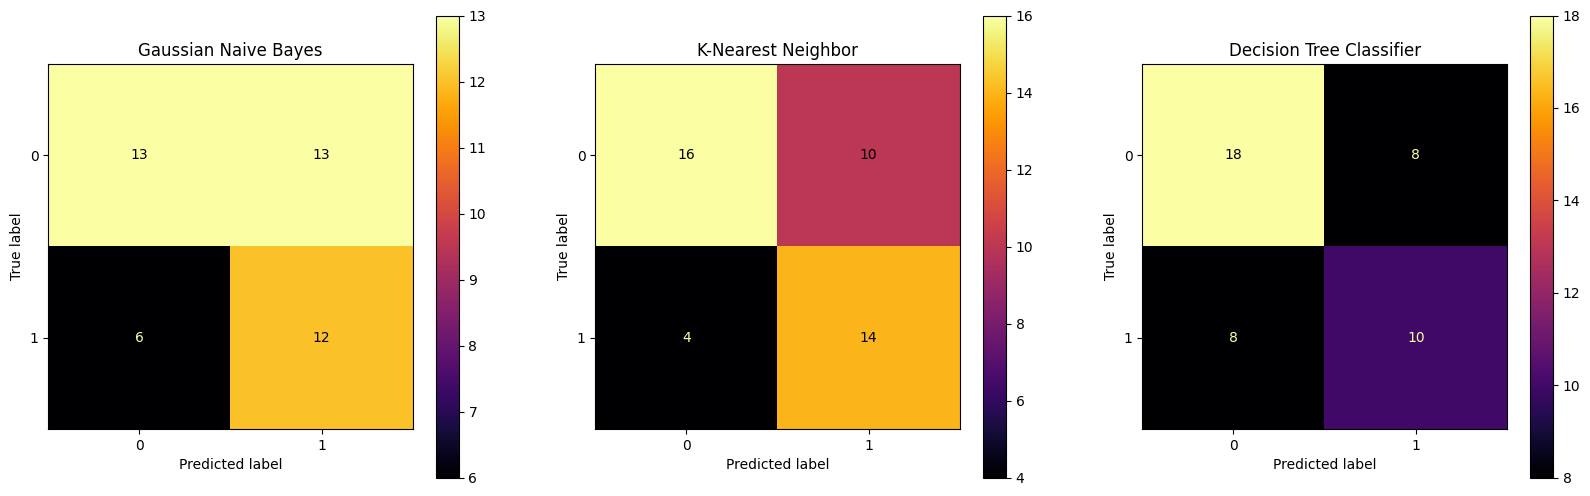

In [49]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,6))

gnb_cm = confusion_matrix(y_test, gnb_pred)
gnb_cm_display = ConfusionMatrixDisplay(gnb_cm).plot(ax=axes[0], cmap='inferno')
gnb_cm_display.ax_.set_title("Gaussian Naive Bayes")

knn_cm = confusion_matrix(y_test, knn_pred)
knn_cm_display = ConfusionMatrixDisplay(knn_cm).plot(ax=axes[1], cmap='inferno')
knn_cm_display.ax_.set_title("K-Nearest Neighbor")

dtc_cm = confusion_matrix(y_test, dtc_pred)
dtc_cm_display = ConfusionMatrixDisplay(dtc_cm).plot(ax=axes[2], cmap='inferno')
dtc_cm_display.ax_.set_title("Decision Tree Classifier")

plt.show()

Confusion matrix adalah tabel dua dimensi yang membandingkan hasil prediksi model klasifikasi dengan nilai sebenarnya. Confusion matrix terdiri dari empat sel utama:
1. True Positive (TP), jumlah observasi positif yang
benar diprediksi oleh model.
2. True Negative (TN), jumlah observasi negatif
yang benar diprediksi oleh model.
3. False Positive (FP), jumlah observasi negatif yang salah diprediksi sebagai positif oleh model.
4. False Negative (FN), jumlah observasi positif yang salah diprediksi sebagai negatif oleh model.

Dari confusion matrix yang telah ditampilkan didapatkan hasil bahwa:
1. **Gaussian Naive Bayes** : TP = 12, TN = 13, FP = 13, FN = 6.
2. **K-Nearest Neighbor** : TP = 14, TN = 16, FP = 10, FN = 4.
3. **Decision Tree Classifier** : TP = 10, TN = 18, FP = 8, FN = 8.


In [50]:
# buat list model dan nama model
models = [pipeline_gnb, pipeline_knn, pipeline_dtc]
model_names = ['Gaussian Naive Bayes', 'K-Nearest Neighbor', 'Decision Tree Classifier']

# inisialisasi list untuk menyimpan hasil evaluasi
acc_scores = []
pre_scores = []
rec_scores = []
f1_scores = []
roc_scores = []

# loop untuk setiap model
for model in models:
    # prediksi target variabel pada data uji
    y_pred = model.predict(x_test)

    # hitung nilai roc-auc
    roc = roc_auc_score(y_test, y_pred)

    # hitung false positive rate (fpr) dan true positive rate (tpr) untuk kurva roc
    fpr, tpr, _ = roc_curve(y_test, y_pred)

    # tambahkan nilai-nilai evaluasi pada list
    acc_scores.append(accuracy_score(y_test, y_pred) * 100)
    pre_scores.append(precision_score(y_test, y_pred) * 100)
    rec_scores.append(recall_score(y_test, y_pred) * 100)
    f1_scores.append(f1_score(y_test, y_pred) * 100)
    roc_scores.append(roc * 100)

# buat dataframe dari hasil evaluasi
df_eval = pd.DataFrame({'': model_names,
                        'Accuracy (%)': acc_scores,
                        'Precision (%)': pre_scores,
                        'Recall (%)': rec_scores,
                        'F1-Score (%)': f1_scores,
                        'ROC-AUC (%)': roc_scores})

# set index dataframe menjadi kosong
df_eval = df_eval.set_index('')

# ubah nama axis pada index dan kolom
df_eval = df_eval.rename_axis(None, axis=0).rename_axis('', axis=1)

# menampilkan dataframe dengan style untuk highlight nilai tertinggi
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

df_eval = df_eval.style.apply(highlight_max, axis=0)

# tampilkan dataframe
display(df_eval)

,Accuracy (%),Precision (%),Recall (%),F1-Score (%),ROC-AUC (%)
Gaussian Naive Bayes,56.818182,48.000000,66.666667,55.813953,58.333333
K-Nearest Neighbor,68.181818,58.333333,77.777778,66.666667,69.658120
Decision Tree Classifier,63.636364,55.555556,55.555556,55.555556,62.393162


Setelah mengetahui nilai TP, FP, TN, dan FN maka akan dilakukan perhitungan score untuk mengetahui kinerja model atau solusi yang dikembangkan dalam tahap pemodelan. Score ini membantu dalam mengevaluasi seberapa baik model atau solusi tersebut dapat memprediksi atau mengklasifikasikan data yang belum pernah dilihat sebelumnya. Dengan melihat hasil score persentase dari perhitungan accuracy, precision, recall, f1-score, dan roc-auc dapat diketahui bahwa diantara ketiga algoritma tersebut K-Nearest Neighbor memiliki persentase score yang tinggi.

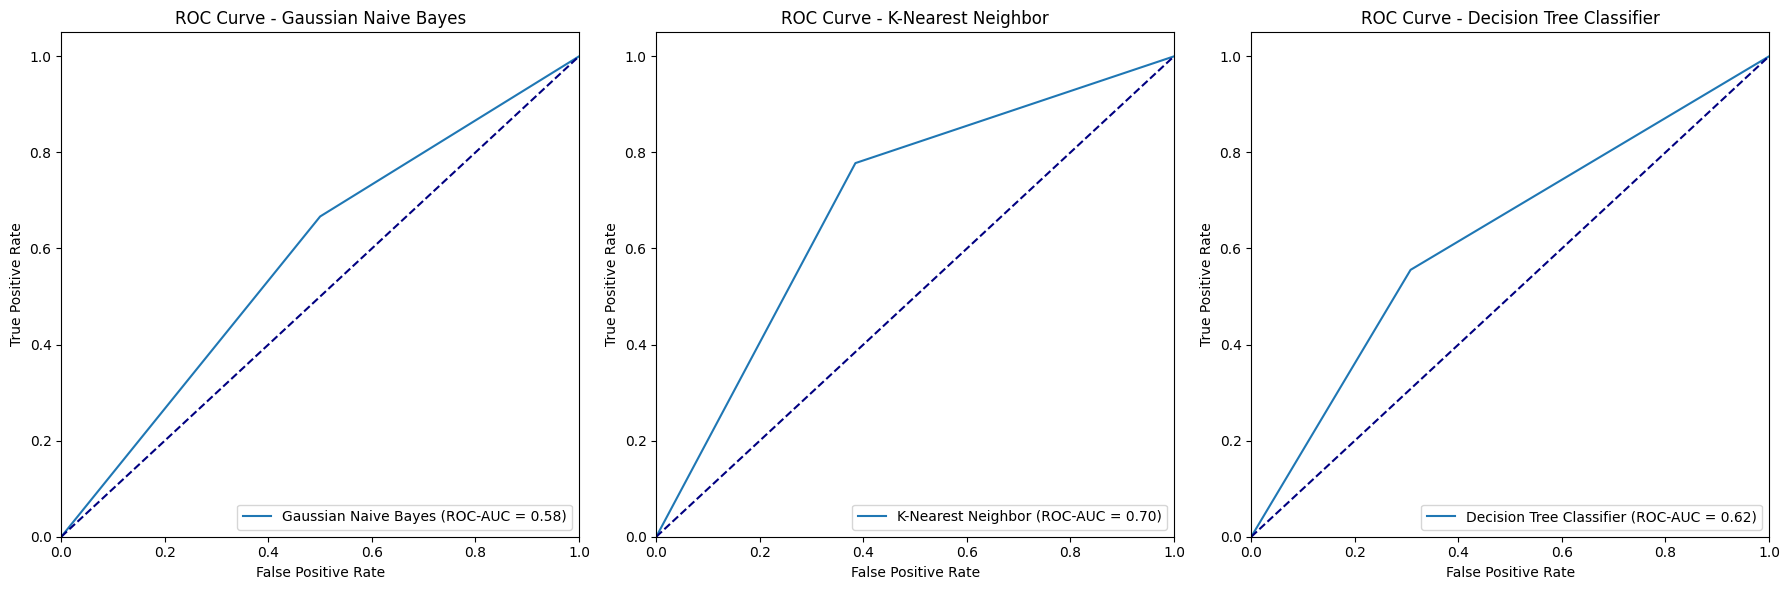

In [51]:
models = [pipeline_gnb, pipeline_knn, pipeline_dtc]
model_names = ['Gaussian Naive Bayes', 'K-Nearest Neighbor', 'Decision Tree Classifier']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for model, name, ax in zip(models, model_names, axes):
    y_pred = model.predict(x_test)

    fpr, tpr, _ = roc_curve(y_test, y_pred)

    roc_auc = roc_auc_score(y_test, y_pred)

    ax.plot(fpr, tpr, label=f'{name} (ROC-AUC = {roc_auc:.2f})')
    ax.plot([0, 1], [0, 1], color='navy', linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'ROC Curve - {name}')
    ax.legend(loc='lower right')

plt.tight_layout()
plt.show()

ROC-AUC adalah metrik yang berguna untuk memberikan gambaran tentang kinerja keseluruhan dari model klasifikasi, terutama ketika penting untuk memperhitungkan sensitivitas (true positive rate) dan spesifisitas (true negative rate) secara bersamaan. Jika dilihat dari ketiga plot tersebut, dapat disimpulkan bahwa dari ketiga algoritma tersebut yang memiliki kinerja yang baik adalah K-Nearest Neighbor karena memiliki score yang lebih tinggi, yaitu 0.70.

### **Review Process**

#### **Cross Validation**

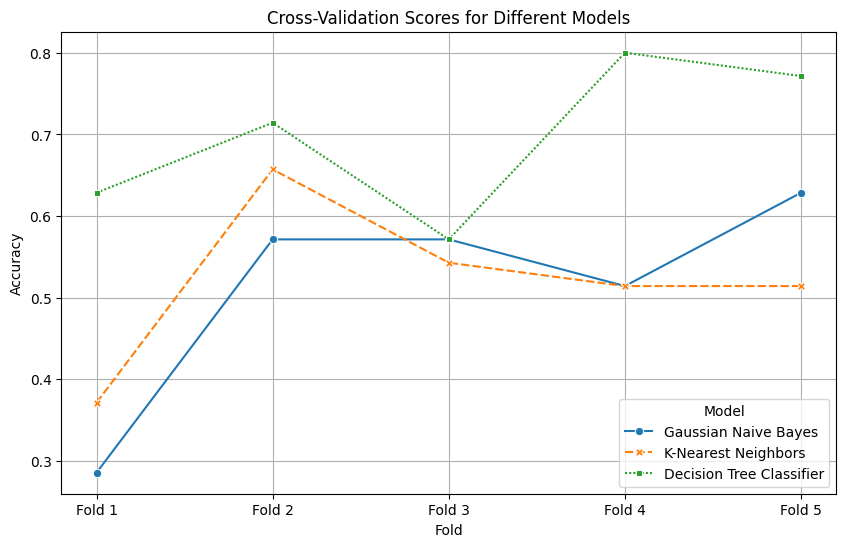

In [52]:
# Inisialisasi model
models = [pipeline_gnb, pipeline_knn, pipeline_dtc]
model_names = ['Gaussian Naive Bayes', 'K-Nearest Neighbors', 'Decision Tree Classifier']

cv_scores = {}
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

for name, model in zip(model_names, models):
    scores = cross_val_score(model, x_train, y_train, cv=k_fold, scoring='accuracy')
    cv_scores[name] = scores

# Buat dataframe dari hasil validasi silang
df_cv_scores = pd.DataFrame(cv_scores)

# Tampilkan visualisasi hasil validasi silang dengan lineplot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_cv_scores, markers=True)
plt.title('Cross-Validation Scores for Different Models')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(title='Model', loc='lower right')
plt.xticks(ticks=range(5), labels=['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5'])
plt.show()

Dilakukan cross validation untuk mengevaluasi kinerja algoritma yang digunakan dalam model klasifikasi secara objektif dan mengukur seberapa baik algoritma tersebut akan berkinerja pada data yang belum pernah dilihat sebelumnya. Dengan menggunakan teknik ini, dapat menghindari overfitting (di mana model terlalu sesuai dengan data pelatihan dan tidak umum) atau underfitting (di mana model terlalu sederhana untuk memahami pola dalam data). Pada algoritma Gaussian Naive Bayes dan K-Nearest Neighbor dapat dilihat hasil cross-validation menunjukkan akurasi yang stabil dan konsisten di setiap iterasi. Ini menunjukkan bahwa model memiliki kinerja yang solid di seluruh dataset, tidak hanya pada subset tertentu.

#### **Feature Selection**

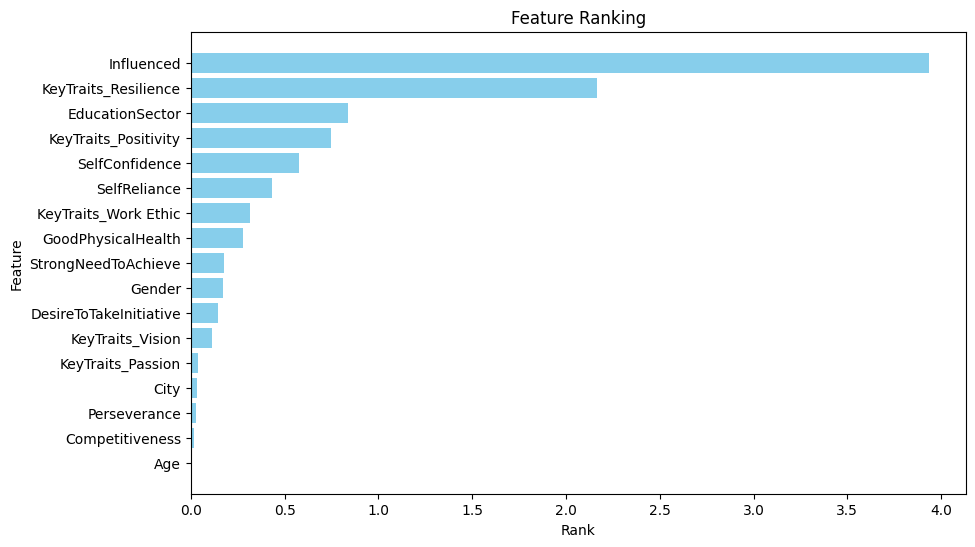

In [53]:
selector = SelectKBest(score_func=chi2, k=10)

selector.fit(x_train, y_train)

feature_ranks = selector.scores_

feature_names = x_train.columns

feature_ranks_df = pd.DataFrame({'Feature': feature_names, 'Rank': feature_ranks})

feature_ranks_df = feature_ranks_df.sort_values(by='Rank', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_ranks_df['Feature'], feature_ranks_df['Rank'], color='skyblue')
plt.xlabel('Rank')
plt.ylabel('Feature')
plt.title('Feature Ranking')
plt.gca().invert_yaxis()
plt.show()

Setiap fitur memiliki pengaruh dalam analisis yang dilakukan dalam model klasifikasi. Dari hasil diatas, ditampilkan kolom-kolom pada data train yang memiliki pengaruh dalam analisis dan diurutkan berdasarkan pengaruhnya. Dapat disimpulkan bahwa fitur yang paling berpengaruh adalah pada influenced karena memiliki rank yang tinggi.

#### **Tuning Hyperparameter**

In [54]:
# Latih model KNN
pipeline_knn.fit(x_train, y_train)

# Evaluasi model sebelum tuning
y_pred_before = pipeline_knn.predict(x_test)
accuracy_before = accuracy_score(y_test, y_pred_before)
print("Accuracy before tuning:", accuracy_before)

# List k yang akan diuji
k_values = [3, 5, 7]

best_accuracy = 0

# Evaluasi model setelah tuning
y_pred_after = pipeline_knn.predict(x_test)
accuracy_after = accuracy_score(y_test, y_pred_after)
print("Accuracy after tuning:", accuracy_after)

Accuracy before tuning: 0.6818181818181818
Accuracy after tuning: 0.6818181818181818


Tuning hyperparameter adalah proses mencari kombinasi nilai yang optimal untuk hyperparameter sebuah model machine learning. Tuning hyperparameter dilakukan untuk meningkatkan performa model, seperti meningkatkan akurasi atau mengurangi overfitting. Dari hasil tunning hyerparameter yang dilakukan diketahui bahwa nilai accuracy sebelum dilakukan tuning dan sesudah dilakukan tuning sama.

### **Determine Next Steps**

Dalam tahapan evaluasi adalah tahap yang dilakukan untuk dilakukan pengembangan pada model dengan mengevaluasi hasil yang sebelumnya telah dilakukan. Berdasarkan hasil evaluasi model klasifikasi yang dilakukan, diketahui kinerja dari ketiga algoritma yang digunakan, yaitu Gaussian Naive Bayes, K-Nearest Neighbor, dan Decision Tree Classifier.

Dari hasil evaluasi yang dilakukan dapat disimpulkan bahwa K-Nearest Neighbor memiliki performa yang lebih baik diantara algoritma lainnya. Performa tersebut ditunjukkan dari score persentase dari akurasi, presisi, recall, F1-score, dan ROC-AUC. Hal ini menunjukkan bahwa model K-Nearest Neighbor memiliki kemampuan untuk memprediksi yang cukup baik dibandingkan algoritma Gaussian Naive Bayes dan Decision Tree Classifier. Dengan demikian, berdasarkan hasil evaluasi yang dilakukan, K-Nearest Neighbor adalah algoritma yang cukup optimal dari diantara ketiga algoritma yang digunakan untuk model klasifikasi pada analisis yang dilakukan.

## **DEPLOYMENT**

### **Generate Model**

In [55]:
pickle.dump(pipeline_knn, open('knn.pkl', 'wb'))

### **Import Dataset**

In [56]:
df.to_csv('dataset.csv', index=False)